### **Выявление закономерностей успешности игр в интернет-магазине «Стримчик».**

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования:**
1. EDA Провести исследовательский анализ данных:
- Посмотреть сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Отобрать данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

2. Составить портрет пользователя каждого региона:
- Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Разница?
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

3. Проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования:**

Моё исследование пройдет в несколько этапов:
* Загружу данные, файл '/datasets/games.csv'
* Обзор данных, посмотрю их качество
* Предобработка данных (проверка типов данных, проверка на пропуски и их заполнение или удаление, проверка категориальных значений, проверка на аномальные значения, проверка на дубликаты)
* Расчеты и добавление новых столбцов-результатов в таблицы
* Проведение анализа по целям исследования
* Написание общего вывода

### **Описание данных**

**Описание данных**

Датасет '/datasets/games.csv':

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Возрастная классификация игр в разных странах:**

<img src='https://media.kasperskydaily.com/wp-content/uploads/sites/90/2016/03/06042545/ratings-comparison.jpg' width=600, heigth=600>

Есть несколько рейтингов, которые есть в датасете, но не входящие в эту таблицу:

* «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
* «K-A» ("Kids to Adults") так назывался первоначально = «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет).

## 1. Загрузка данных

### 1.1 Импортируем библиотеки, откроем csv

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

import seaborn as sns
# применяем стиль whitegrid
sns.set_style('whitegrid')

import plotly.express as px
# (!) для отображения интерактивных графиков plotly как картинок на github:
# для интерактивности лучше смотреть локально без этих параметров
!pip install -U kaleido==0.2.1 #post1
import kaleido
import plotly.io as pio
pio.renderers.default = "png"

from scipy import stats as st

from statsmodels.stats.power import TTestIndPower

import warnings
warnings.filterwarnings("ignore")

ERROR: Invalid requirement: '#post1'

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# откроем файл *.csv
try:
    try:
        df = pd.read_csv('games.csv')
    except:
        df = pd.read_csv('/datasets/games.csv')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_22 dop_project/games.csv')

### 1.2 Основная информация о дф, краткие хар-ки

In [3]:
# выведем инфо о дф с типами данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски данных есть в: Name, Year_of_Release, Genre, Critic_Score (больше всего), User_Score, Rating (больше всего).

In [4]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample(2).T) # удал пропуски, возвращаем случайную строку, транспонируем
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. MIN {df[col].min():_.0f}, AVG: {df[col].mean():_.1f}, MAX: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. MIN {df[col].dropna().min()}, MAX: {df[col].dropna().max()}")

In [5]:
# исследуем датасет
lookup(df)

Dataset shape (16715, 11) example:


,12240,12334
Name,Karaoke Revolution Party,Tournament of Legends
Platform,XB,Wii
Year_of_Release,2005.0,2010.0
Genre,Misc,Fighting
NA_sales,0.05,0.04
EU_sales,0.01,0.02
JP_sales,0.0,0.0
Other_sales,0.0,0.01
Critic_Score,80.0,45.0
User_Score,tbd,6.9


Name — 11559 values. MIN  Beyblade Burst, MAX: ¡Shin Chan Flipa en colores!
Platform — 31 values. MIN 2600, MAX: XOne
Year_of_Release — 37 values. MIN 1_980, AVG: 2_006.5, MAX: 2_016


,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle,nan
Genre,3_369,2_348,1_750,1_498,1_323,1_303,1_249,888,873,849,683,580,2


NA_sales — 402 values. MIN 0, AVG: 0.3, MAX: 41
EU_sales — 307 values. MIN 0, AVG: 0.1, MAX: 29
JP_sales — 244 values. MIN 0, AVG: 0.1, MAX: 10
Other_sales — 155 values. MIN 0, AVG: 0.0, MAX: 11
Critic_Score — 82 values. MIN 13, AVG: 69.0, MAX: 98
User_Score — 96 values. MIN 0, MAX: tbd


,nan,E,T,M,E10+,EC,RP,K-A,AO
Rating,6_766,3_990,2_961,1_563,1_420,8,3,3,1


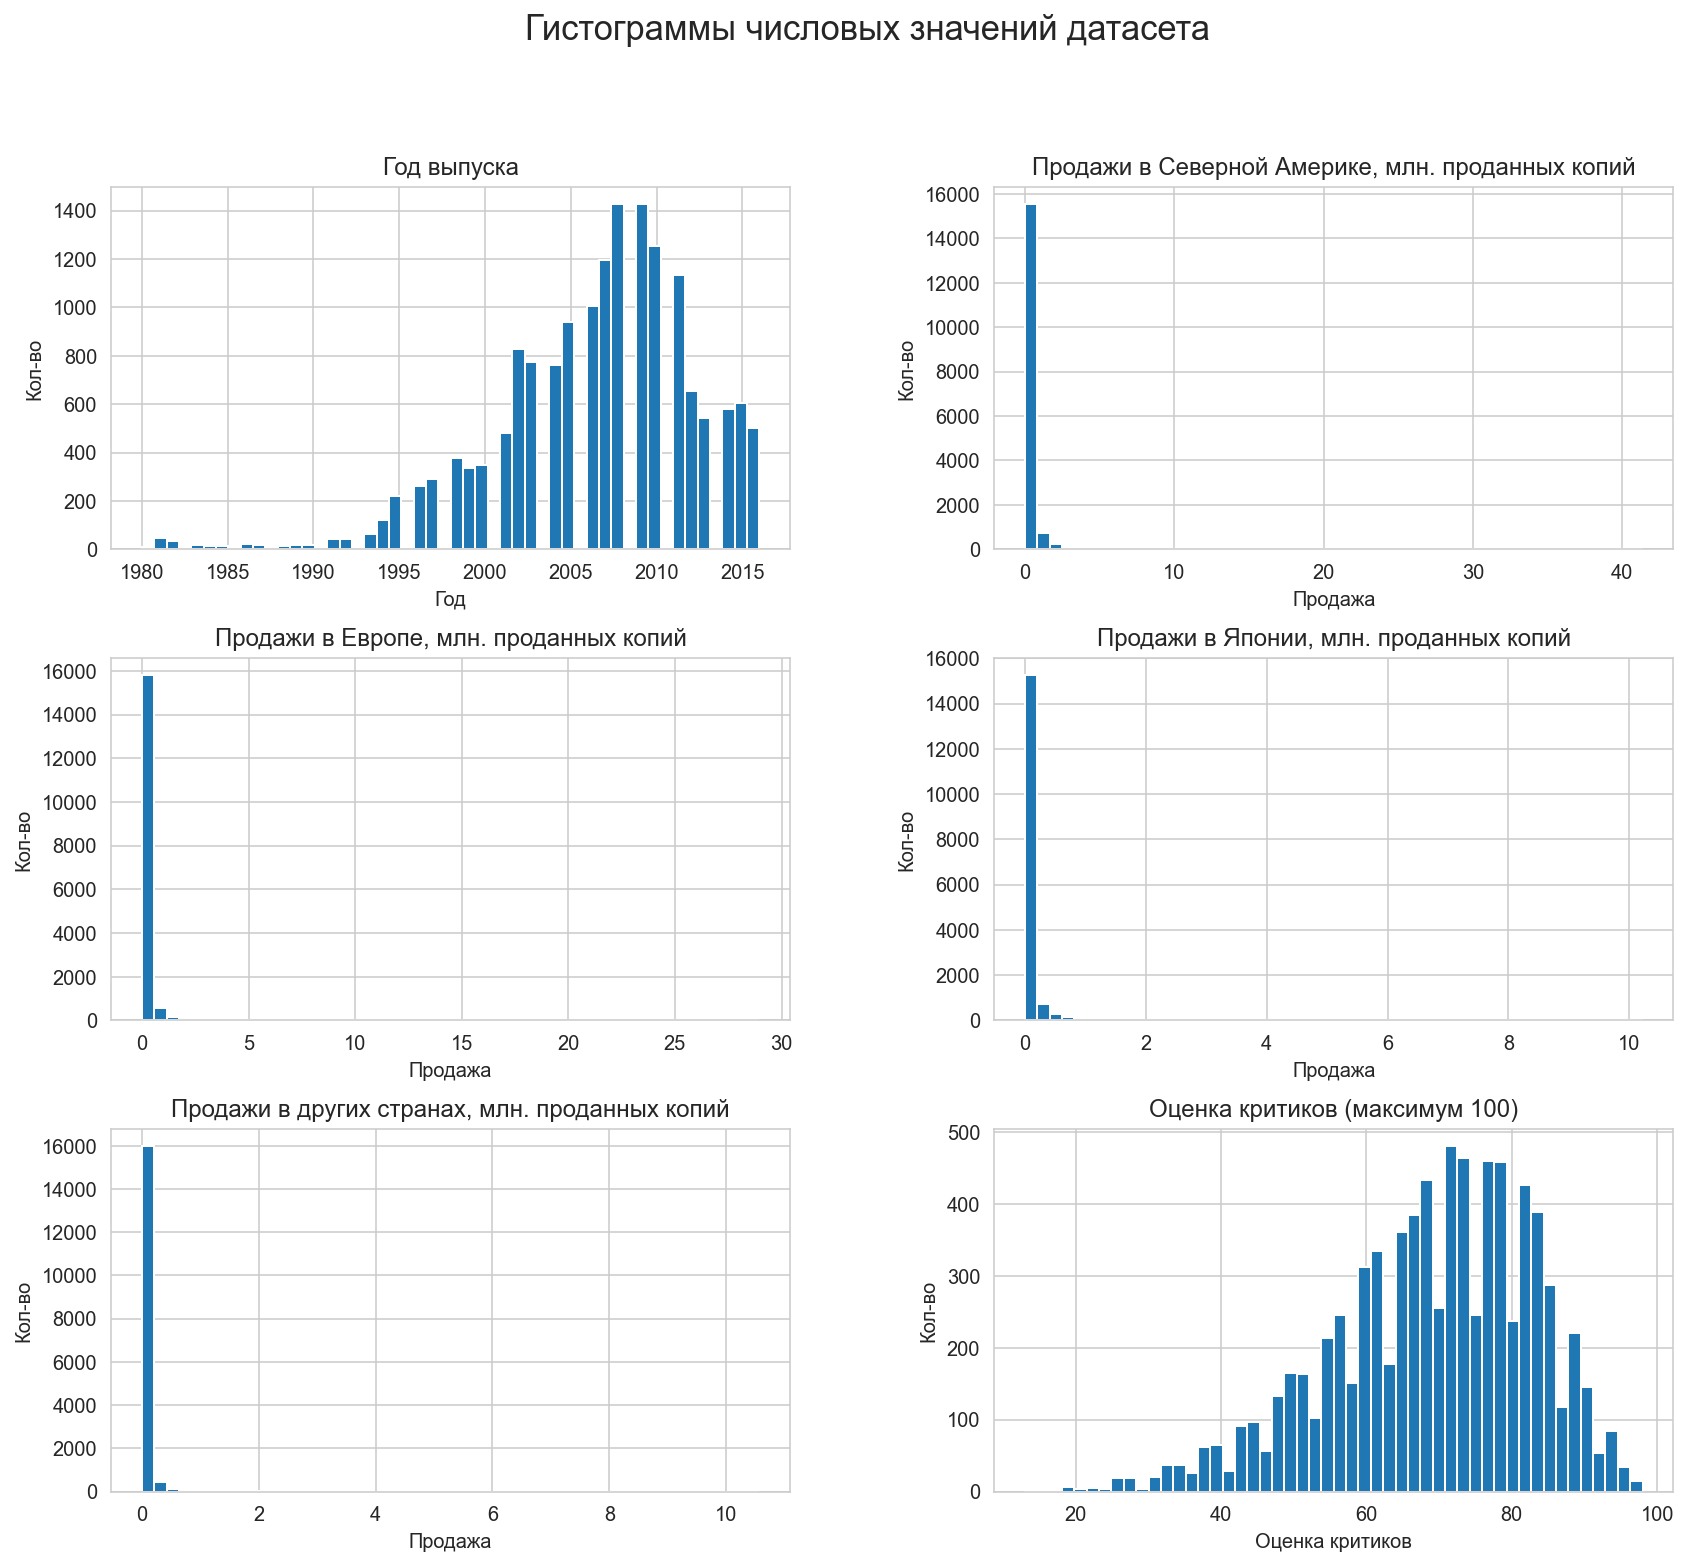

In [6]:
# количественные признаки, распределение
axes = df.hist(bins=50, figsize = (14,12))
axes[0,0].set_title('Год выпуска')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Кол-во')

axes[0,1].set_title('Продажи в Северной Америке, млн. проданных копий')
axes[0,1].set_xlabel('Продажа')
axes[0,1].set_ylabel('Кол-во')

axes[1,0].set_title('Продажи в Европе, млн. проданных копий')
axes[1,0].set_xlabel('Продажа')
axes[1,0].set_ylabel('Кол-во')

axes[1,1].set_title('Продажи в Японии, млн. проданных копий')
axes[1,1].set_xlabel('Продажа')
axes[1,1].set_ylabel('Кол-во')

axes[2,0].set_title('Продажи в других странах, млн. проданных копий')
axes[2,0].set_xlabel('Продажа')
axes[2,0].set_ylabel('Кол-во')

axes[2,1].set_title('Оценка критиков (максимум 100)')
axes[2,1].set_xlabel('Оценка критиков')
axes[2,1].set_ylabel('Кол-во')

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

**Краткий вывод:**
* Пропуски данных есть в: Name, Year_of_Release, Genre, Critic_Score (больше всего), User_Score, Rating (больше всего). Нужно заполнить где есть возможность
* Нужно изменить тип данных у: Year_of_Release - int, Critic_Score пересмотреть возможно тоже в int, User_Score	- float.
* Не стандартные значения есть у User_Score 'tbd' (общепринятая расшифровка это “To Be Determined”, где окончательное решение еще не принято, но появится в будущем. Возможно оценок пользователей пока нет, или их недостаточно). Но присутствуют и значения 0. В основном столбец наверное логично заменить на Nan, так как по факту числовой рейтинг отсутствует.

## 2. Предобработка данных

In [7]:
# создадим копию дф, и будем работать с копией
df1 = df.copy()

### 2.1. Преобразуем названия столбцов

In [8]:
# преобразуем названиея столбцов к нижнему питоновскому регистру
df1.columns = df1.columns.str.lower()
df1.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Преобразуем типы данных, заполним пропуски

In [9]:
# посмотрим пропущенные имена
df1.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
# удалим эти два значения, это очень незначительно
df1 = df1.dropna(subset = ['name'])

In [11]:
# посмотрим где пропущены года
print('Количество пропусков в годах:', len(df1.query('year_of_release.isna()')))
print('Доля пропусков в %:', round(len(df1.query('year_of_release.isna()')) /len(df1)*100, 1))

Количество пропусков в годах: 269
Доля пропусков в %: 1.6


In [12]:
# удалим пропуски в годах, т.к. 1,6% пропусков это незначительно
df1 = df1.dropna(subset = ['year_of_release'])
# переведем в целыt числа
df1['year_of_release'] = df1['year_of_release'].astype('int')

In [13]:
# посмотрим значения Critic_Score оценка критиков (максимум 100)
df1['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Заполнять пропуски critic_score не будем, потому что это будет перекос среднего/медианного. Пусть остается float64

In [14]:
# посмотрим уникальные значения 'user_score'
print(df1['user_score'].unique())
df1['user_score'].value_counts()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.9       2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Много 'tbd' (общепринятая расшифровка это “To Be Determined”, где окончательное решение еще не принято) в рейтинговой ассоциации США говорит о том, что есть игры зарубежные которые не выпускались в США и у них просто нет рейтинга.

In [15]:
# заполним в основном столбце tbd на None
df1['user_score'] = df1['user_score'].replace('tbd', np.nan) 
# просто "None" не подходит, т.к. будет как ffill() заполнит пропуск пред не пустым значением

# и переведем во float и проверим типы
df1['user_score'] = df1['user_score'].astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [16]:
# rating — рейтинг от организации ESRB
# «RP» («Rating Pending») — «Рейтинг ожидается» - заменим на Nan
# «K-A» ("Kids to Adults") так назывался первоначально = «E» («Everyone»), заменим на E
df1['rating'] = df1['rating'].replace({'RP':np.nan, 'K-A': 'E'})

# категориальные пустые значения заполним маркером NAN
df1['rating'] = df1['rating'].fillna('NAN')
# проверка
df1['rating'].unique()

array(['E', 'NAN', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

### 2.3. Проверка на дубликаты и качество данных

In [17]:
# проверим явные дубликаты всех строк
display(df1.duplicated().sum())

0

In [18]:
df1.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


In [19]:
# проверим кол-во дубликатов по Имени, Платформе, Году релиза
print(df1[['name', 'platform', 'year_of_release']].duplicated().sum())
# вытащим их. keep=False - сохранить все дубликаты
df_dup_npy = df1[df1.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
df_dup_npy

1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [20]:
# все данные одинаковы, оставим первую строчку где больше продаж
df1 = df1.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
# проверка
print(df1[['name', 'platform', 'year_of_release']].duplicated().sum())

0


In [21]:
# посмотрим уникальные значения названий платформ
print(df1['platform'].unique())
df1['platform'].value_counts()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Можно сделать столбец Разработчик платформы для доп. анализа

In [22]:
# Список игровых консолей
# https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9
# зададим списки - разработчиков консолей
PC = ['PC']
PlayStation = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', ]
Nintendo = ['Wii', 'WiiU', 'DS', 'GBA', 'GB', 'GC', '3DS', 'N64', 'SNES', 'NES']
Xbox = ['X360', 'XB', 'XOne']
SEGA = ['SAT', 'DC', 'GEN', ]
Other = ['2600', '3DO', 'NG', 'WS', 'SCD', 'TG16', 'GG', 'PCFX']
# Atari = ['2600'] # 133
# The_3DO_Company = ['3DO'] #3
# NG # 12 Neo-Geo? и все что ниже не находиться
# WS #6 ??
# SCD #6
# TG16 #2
# GG #1
# PCFX #1

# функция для создания названия разработчиков консолей
def dev(row):
    if row in PC:
        return 'PC'
    elif row in PlayStation:
        return 'PlayStation (Sony)'
    elif row in Nintendo:
        return 'Nintendo'
    elif row in Xbox:
        return 'Xbox (Microsoft)'
    elif row in SEGA:
        return 'SEGA'
    elif row in Other:
        return 'Other'
    else:
        return 'error_check_list'

df1['platform_dev'] = df1['platform'].apply(dev)
df1['platform_dev'].unique()

array(['Nintendo', 'Xbox (Microsoft)', 'PlayStation (Sony)', 'PC',
       'Other', 'SEGA'], dtype=object)

In [23]:
# посмотрим уникальные значения названий платформ
print(df1['year_of_release'].unique())

[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]


Датасет с 1980-2016 года, при этом данные за 2016 год могут быть неполными.

### 2.4. Доп столбцы
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [24]:
df1['sum_sales'] = df1['na_sales'] + df1['eu_sales'] + df1['jp_sales'] + df1['other_sales']

In [25]:
# еще раз исследуем датасет
lookup(df1)

Dataset shape (16443, 13) example:


,2713,6550
name,Wall-E,Puppeteer
platform,PS2,PS3
year_of_release,2008,2013
genre,Platform,Platform
na_sales,0.21,0.11
eu_sales,0.0,0.08
jp_sales,0.0,0.02
other_sales,0.54,0.04
critic_score,67.0,80.0
user_score,8.4,8.5


name — 11426 values. MIN  Beyblade Burst, MAX: ¡Shin Chan Flipa en colores!
platform — 31 values. MIN 2600, MAX: XOne
year_of_release — 37 values. MIN 1_980, AVG: 2_006.5, MAX: 2_016


,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle
genre,3_307,2_305,1_721,1_481,1_296,1_293,1_226,878,857,837,673,569


na_sales — 401 values. MIN 0, AVG: 0.3, MAX: 41
eu_sales — 307 values. MIN 0, AVG: 0.1, MAX: 29
jp_sales — 244 values. MIN 0, AVG: 0.1, MAX: 10
other_sales — 155 values. MIN 0, AVG: 0.0, MAX: 11
critic_score — 81 values. MIN 13, AVG: 69.0, MAX: 98
user_score — 95 values. MIN 0, AVG: 7.1, MAX: 10


,NAN,E,T,M,E10+,EC,AO
rating,6_677,3_923,2_905,1_536,1_393,8,1


,PlayStation (Sony),Nintendo,Xbox (Microsoft),PC,SEGA,Other
platform_dev,6_636,6_169,2_282,957,252,147


sum_sales — 1004 values. MIN 0, AVG: 0.5, MAX: 83


In [26]:
# проверим кол-во пропусков
((pd.concat([df1.isna().sum(),
             df1.isna().mean()],
             axis=1,
             keys=['nan_count', 'nan_share_%']))
 .sort_values(by='nan_count', ascending=False)
 .style.background_gradient('Oranges')
 .format({'nan_share_%':'{:.2%}'})
)

,nan_count,nan_share_%
user_score,8981,54.62%
critic_score,8461,51.46%
name,0,0.00%
platform,0,0.00%
year_of_release,0,0.00%
genre,0,0.00%
na_sales,0,0.00%
eu_sales,0,0.00%
jp_sales,0,0.00%
other_sales,0,0.00%


**Выводы по предобработке:**
* Привел названия колонок к нижнему регистру
* Пропусков годов 1,6% удалили
* В рейтинге 'tbd' (общепринятая расшифровка это “To Be Determined”, где окончательное решение еще не принято, но появится в будущем заменили на Nan, так как по факту числовой рейтинг отсутствует. «RP» («Rating Pending») — «Рейтинг ожидается» - заменил на Nan. «K-A» ("Kids to Adults") так назывался первоначально = «E» («Everyone»), заменил на E.
* Создали доп столбц 'platform_dev' названия разработчиков консолей ['Nintendo', 'Xbox (Microsoft)', 'PlayStation (Sony)', 'PC', 'Other', 'SEGA']
* Добавили 'sum_sales' доп столбец суммарных продаж
* Причины, которые могли привести к пропускам:
    1. В Годе релиза было небольшое кол-во пропусков 1,6%, возможно это какая то техническая ошибка, потому что есть игры и не очень старые за 2008/6/4 года, жанры и платформы рейтинги распределены примерно равномерно.
    2. ESRB - рейтинг для США и Канады. Возможно пропуски в рейтингах 'Rating' означают, что есть игры которые выпускаются не в США/Канаде, а например Японские, которым не присвоен рейтинг.
    3. Оценки критиков 'Critic_Score' и оценки пользователей 'User_Score' имеют пропуски там же, где и нет рейтинга, возможно дф собран с просторов также США/Канады и где не было рейтинга там нет и оценок. Оценки критиков 'Critic_Score' чуть больше пропусков, возможно там критики так и не оценили игру.

## 3. EDA - исследовательский анализ данных

### 3.1  Посмотреть сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

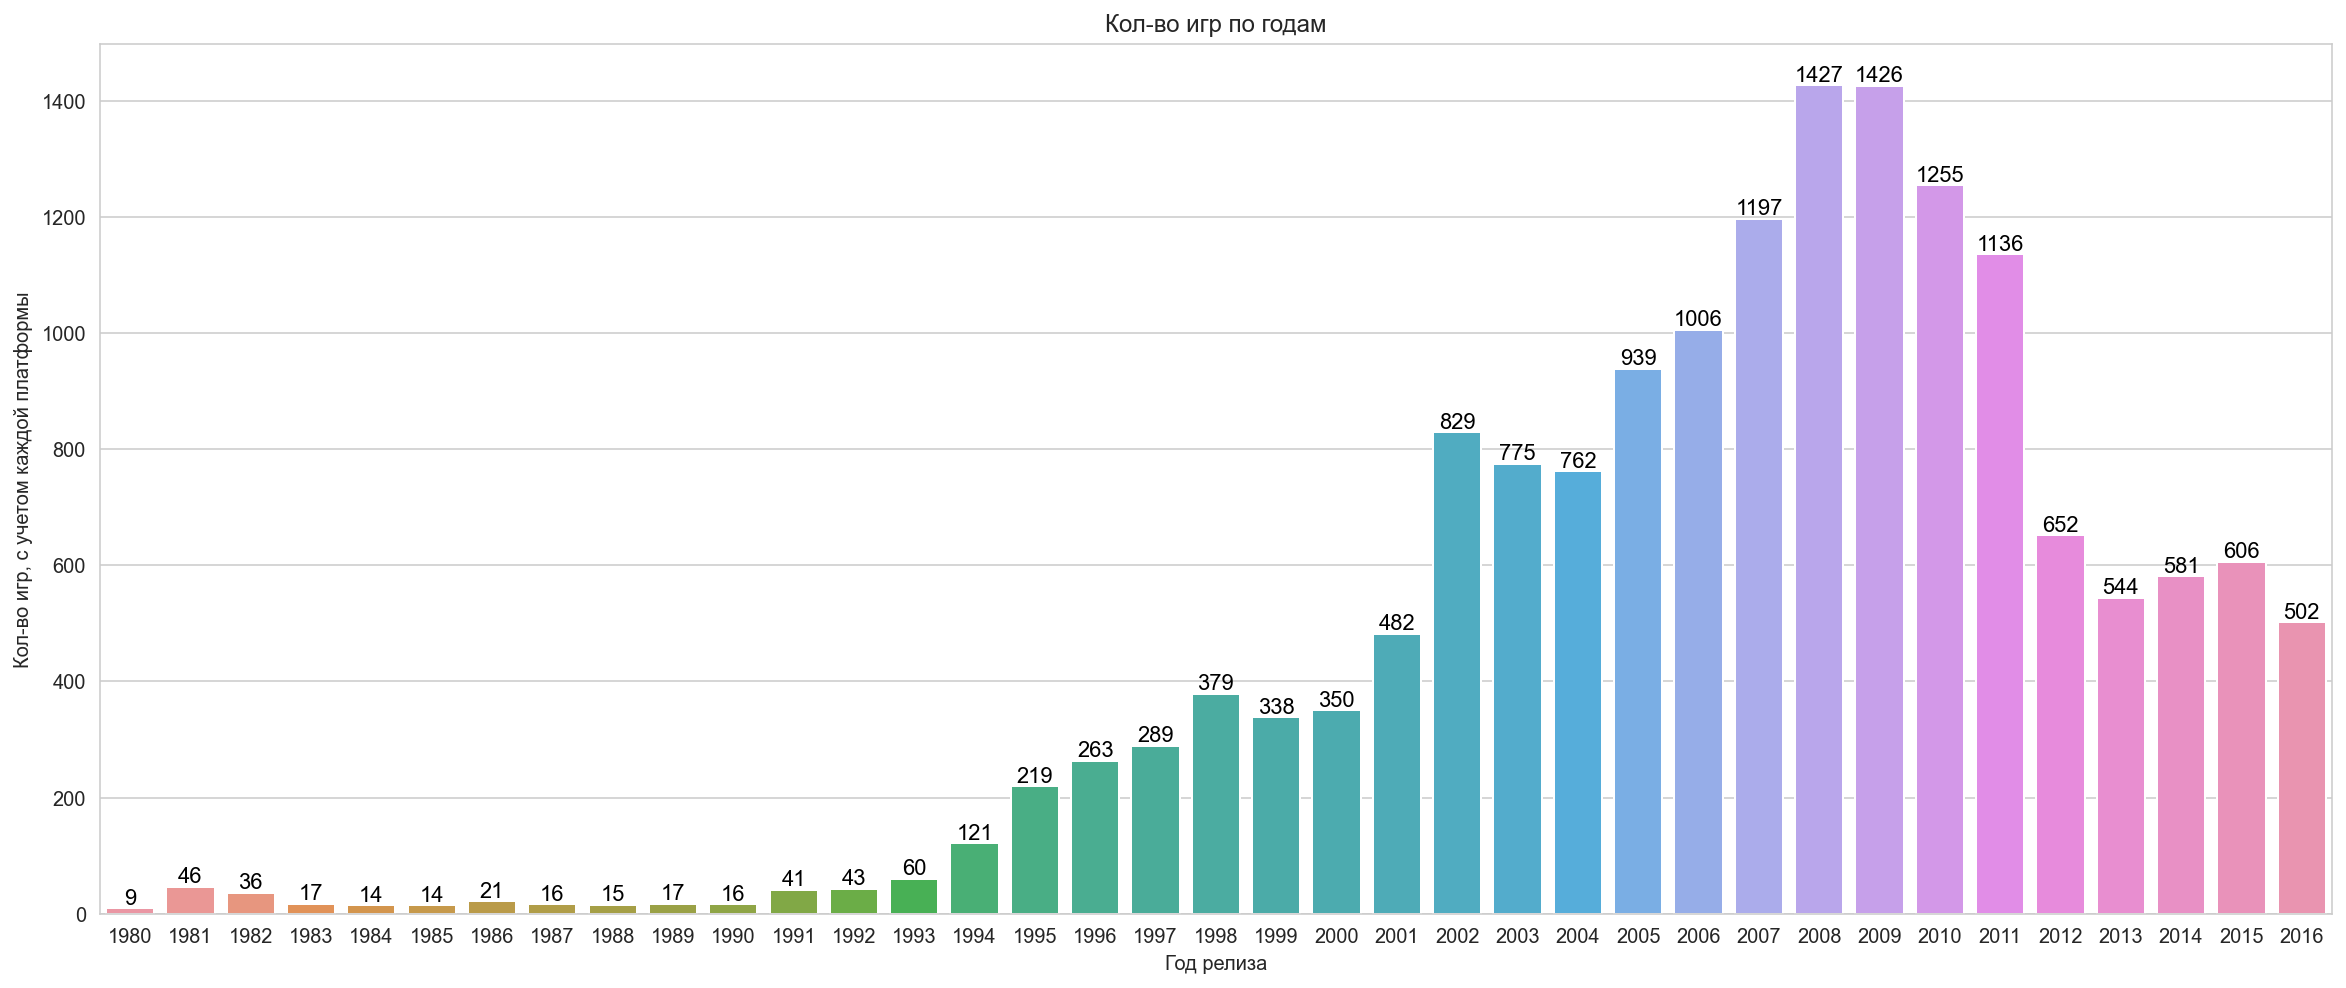

In [27]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(data = df1, x='year_of_release')

# подписи над стоблцами
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                fontsize=11,
                color='black')

plt.title('Кол-во игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр, с учетом каждой платформы')
plt.show()

В 90ые начался тренд на игры и платформы, с 2002 бурный рост и популярность, после 2011 спад по кол-ву игр (заметим, что 1 платформа это +1 игра, но игра может быть выпущена например для 3 платформ и тогда будет +3 в общем по кол-ву). Примерно после 2008 стали популярны игры на смартфонах, это одна из причин снижения кол-ва игр на консолях и пк.
Данные за 2016 год не полные.

Данные до 1994 не особо важны, т.к. там малые значения.

### 3.2  Посмотреть как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
# отберем платформы у которых побольше игр
top_pl = df1['platform'].value_counts().loc[lambda x: x > 240].index.tolist()

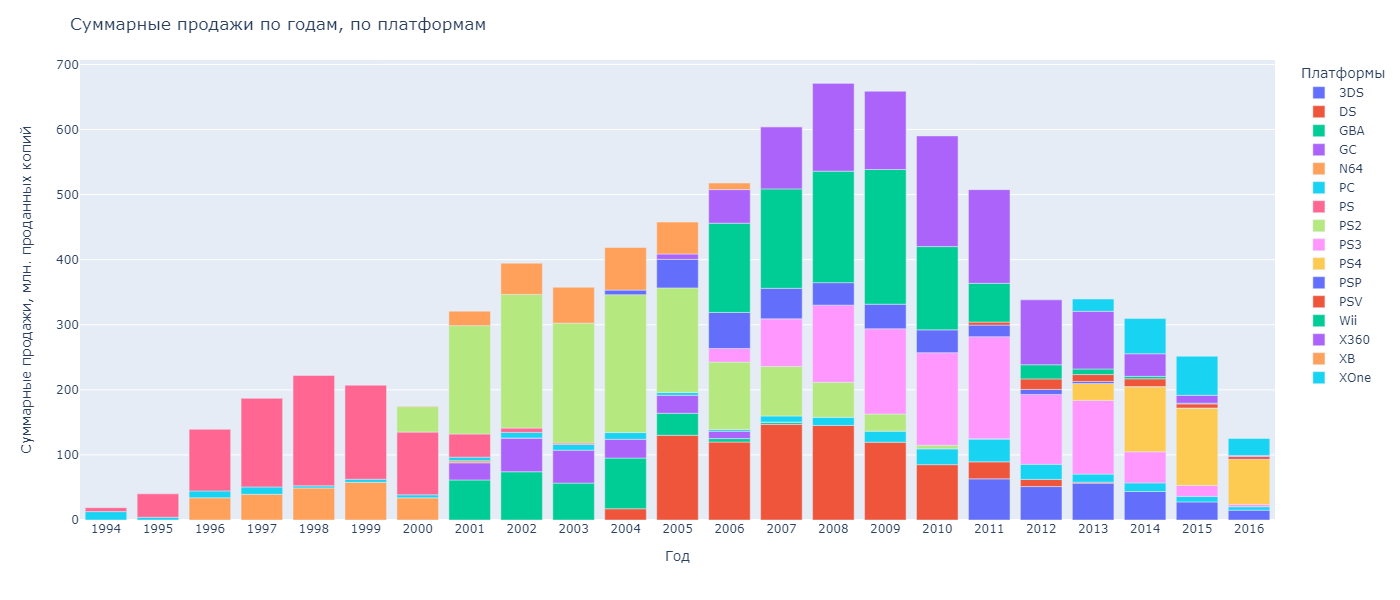

In [29]:
# сгруппируем по платформе
df_pl = (df1.query('platform in @top_pl')
         .groupby(['platform','year_of_release'], as_index=False)['sum_sales'].sum())

fig = px.bar(df_pl,
             x='year_of_release',
             y='sum_sales',
             range_x=[1993.5, 2016.5],
             color='platform',
             width=1400, height=600
             )
# подпишем каждый год
fig.update_xaxes(tickvals=list(range(1994, 2017)))
# добавляем надписи
fig.update_layout(title='Суммарные продажи по годам, по платформам',
                   xaxis_title='Год',
                   yaxis_title='Суммарные продажи, млн. проданных копий',
                   legend_title='Платформы')
fig.show()

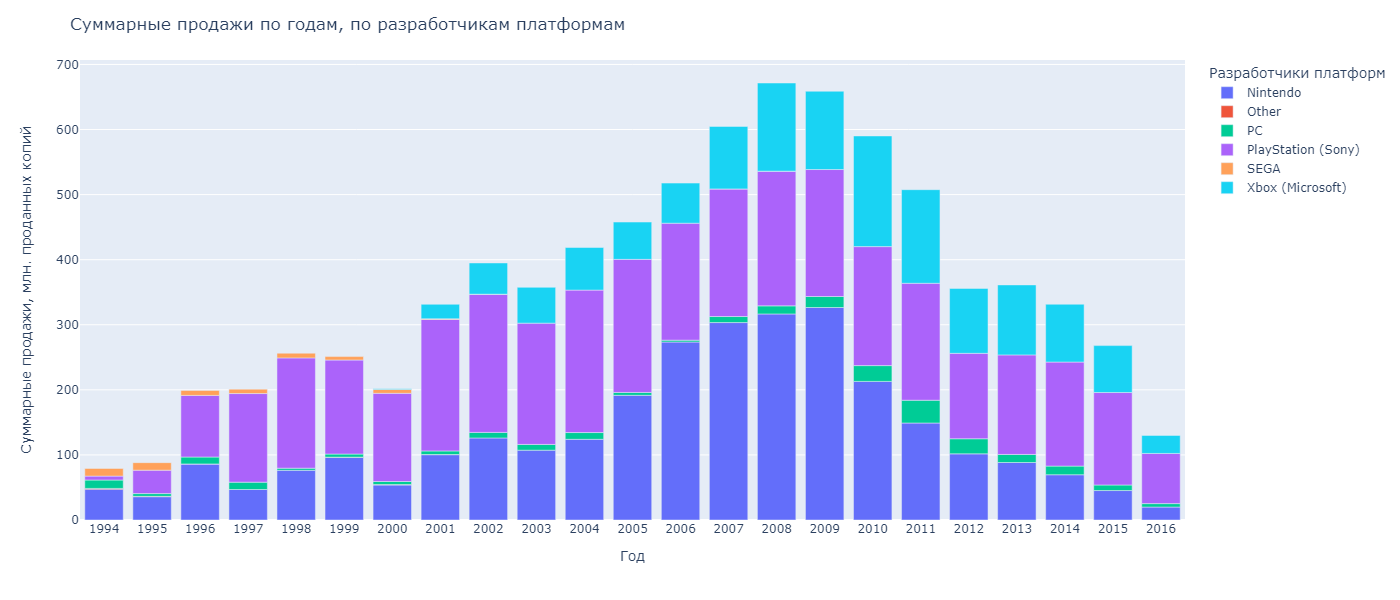

In [30]:
# сгруппируем по разработчикам платформ
df_pl = df1.groupby(['platform_dev','year_of_release'], as_index=False)['sum_sales'].sum()

fig = px.bar(df_pl,
             x='year_of_release',
             y='sum_sales',
             range_x=[1993.5, 2016.5],
             color='platform_dev',
             width=1400, height=600
             )
# подпишем каждый год
fig.update_xaxes(tickvals=list(range(1994, 2017)))
# добавляем надписи
fig.update_layout(title='Суммарные продажи по годам, по разработчикам платформам',
                   xaxis_title='Год',
                   yaxis_title='Суммарные продажи, млн. проданных копий',
                   legend_title='Разработчики платформ')
fig.show()

In [31]:
# медианный срок жизни платформы
time_life = df1.pivot_table(index='platform',
                             values='year_of_release',
                             aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

* Пик продаж оказался на 2008-2009 года, было продано почти 700млн. копий по всему миру.
* Характерный срок жизни платформы 6-10лет, а если быть точным то медианный срок жизни - 7 лет.
* Самая популярная платформа в 2008-2009 года была Nintendo, её популярность идет на спад. PlayStation (Sony) популярна равномерно с 1996-2016 и удерживает лидерство в последние года. Xbox (Microsoft) менее популярна чем Nintendo и PlayStation (Sony), но она вышла на 2ое место в последние годы.

### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

In [32]:
# возьмем промежуток с 1995-2015 (до 1995 малые значения, за 2016 данные не полные)
# для дальнейшего исследования
df_actual = df1.query('year_of_release > 2011') # 2012-2016 - 5лет
df_actual.shape

(2885, 13)

Начиная со следующего пункта мы будем использовать датафрейм с 2012 по 2016года - 5лет

### 3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

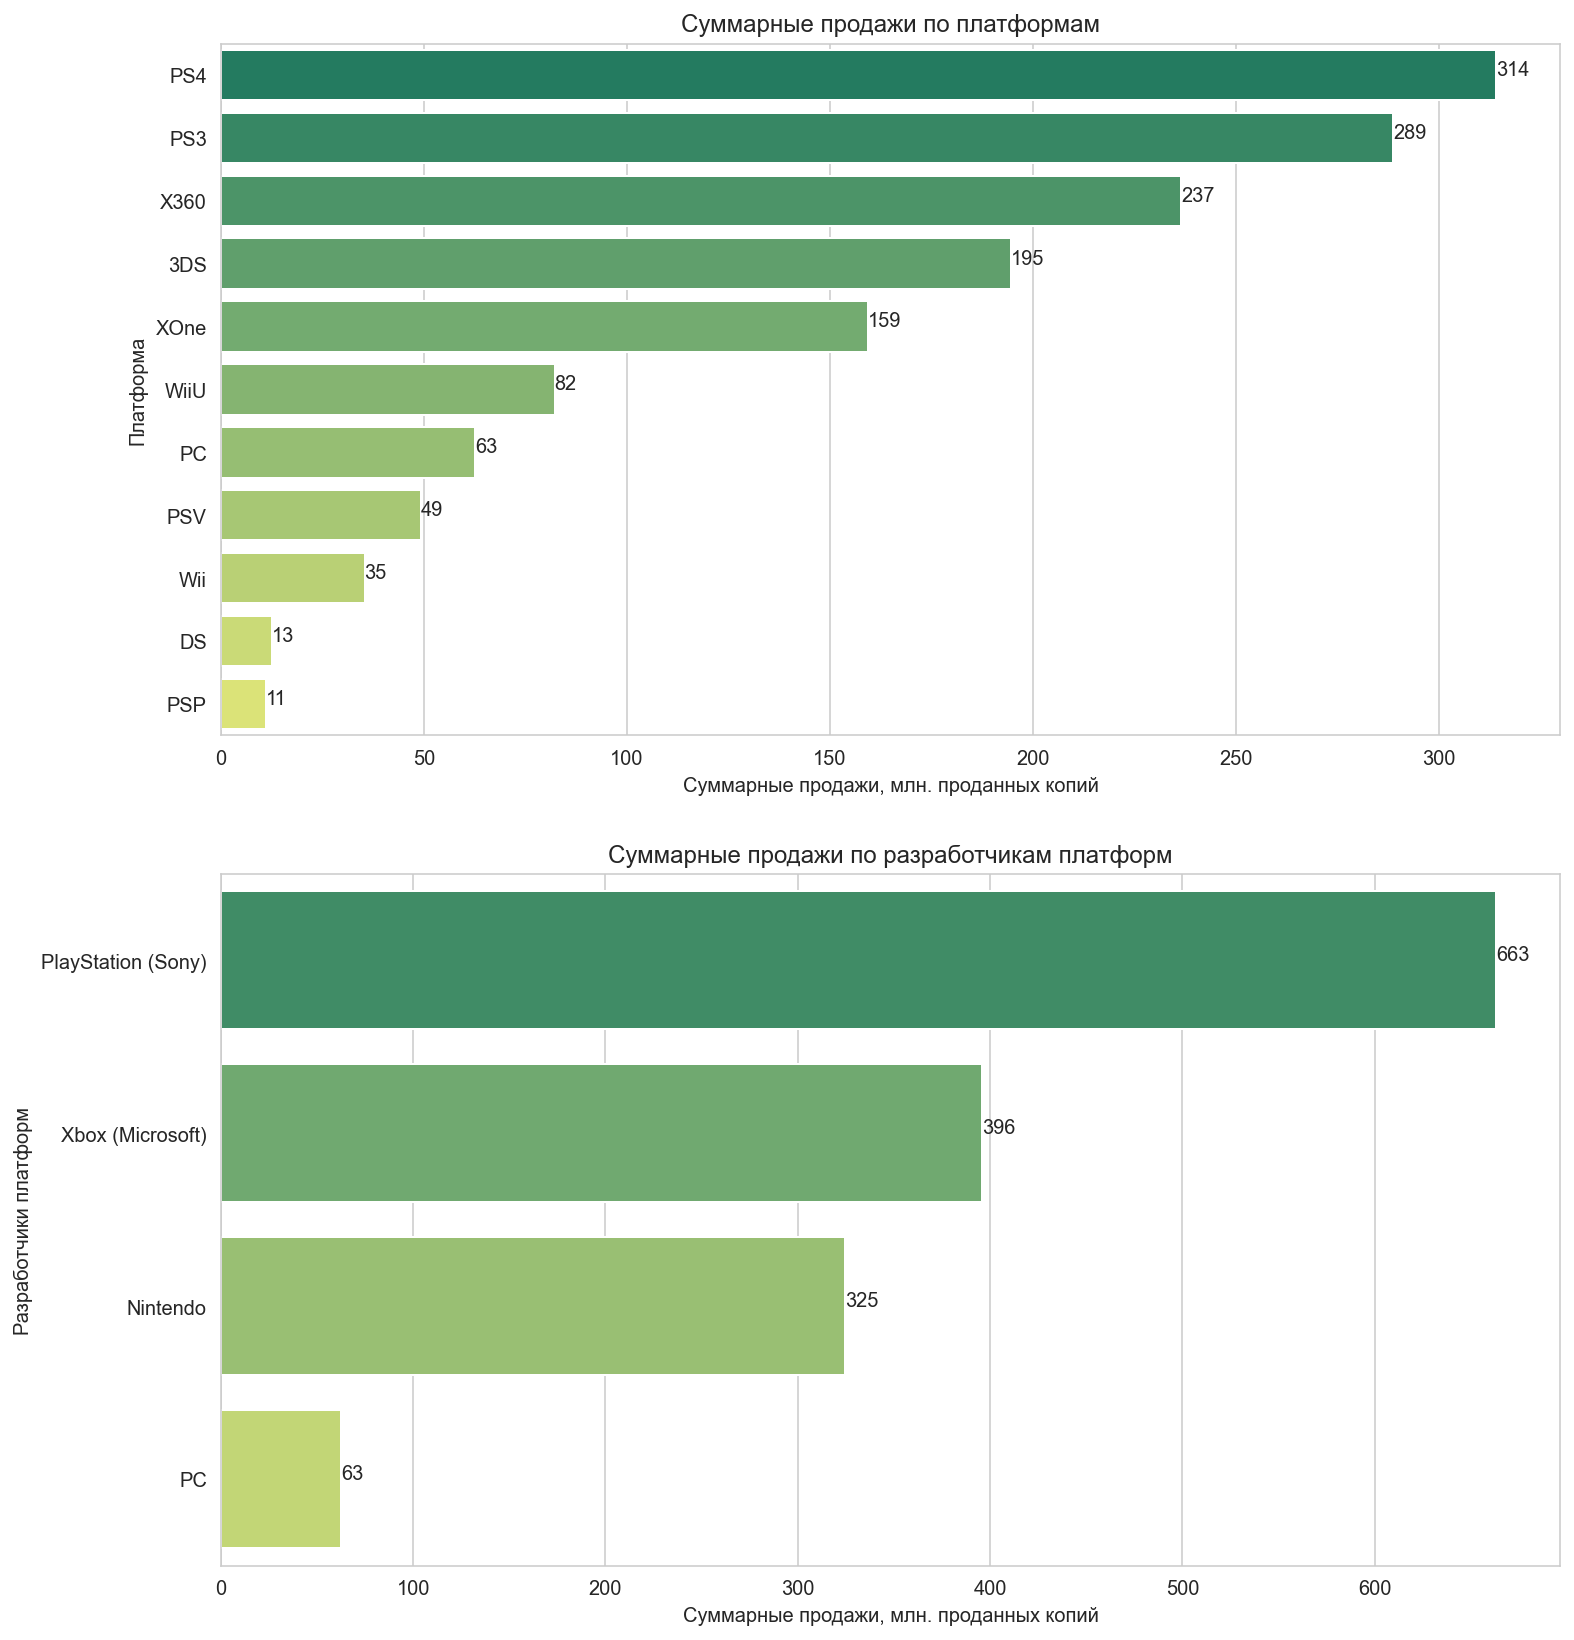

In [33]:
plt.figure(figsize=(12, 14))

ax1 = plt.subplot(2, 1, 1)
# отберем топ 10 платформ по продажам
df_actual_pl =  (df_actual
                 .groupby(['platform'], as_index=False)['sum_sales'].sum()
                 .sort_values(by='sum_sales', ascending=False)
                 #.head(10)
)
sns.barplot(data = df_actual_pl, x='sum_sales', y='platform', ax=ax1, palette='summer') # Blues_r
for y, x in enumerate(df_actual_pl['sum_sales']):
    plt.text(x, y, f'{x:.0f}')
    
plt.title('Суммарные продажи по платформам')
plt.xlabel('Суммарные продажи, млн. проданных копий')
plt.ylabel('Платформа')


ax2 = plt.subplot(2, 1, 2)
# сгруппируем по Разработчикам платформ
df_actual_pl_dev =  (df_actual.groupby(['platform_dev'], as_index=False)['sum_sales'].sum()
                     .sort_values(by='sum_sales', ascending=False))

sns.barplot(data = df_actual_pl_dev, x='sum_sales', y='platform_dev', ax=ax2, palette='summer') # 
for y, x in enumerate(df_actual_pl_dev['sum_sales']):
    plt.text(x, y, f'{x:.0f}')


plt.title('Суммарные продажи по разработчикам платформ')
plt.xlabel('Суммарные продажи, млн. проданных копий')
plt.ylabel('Разработчики платформ')

plt.show()

* На промежутке с 2012-2016года (5лет) среди платформ самая пульму первенства по продажам взяла PS4 - 314млн.копий, 2ое место PS3 -289млн.копий, и после неё затухающий X360 (Xbox Microsoft) и затухающий 3DS(Nintendo), возможно подрастет Xone но данные за 2016 не полные.
* Среди разработчиков платформ закономерно популярная по продажам PlayStation (Sony) с большим отрывом. Xbox (Microsoft) на 2ом месте, в последние года они обогнали Nintendo. Nintendo на 3ем.

### 3.5 Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

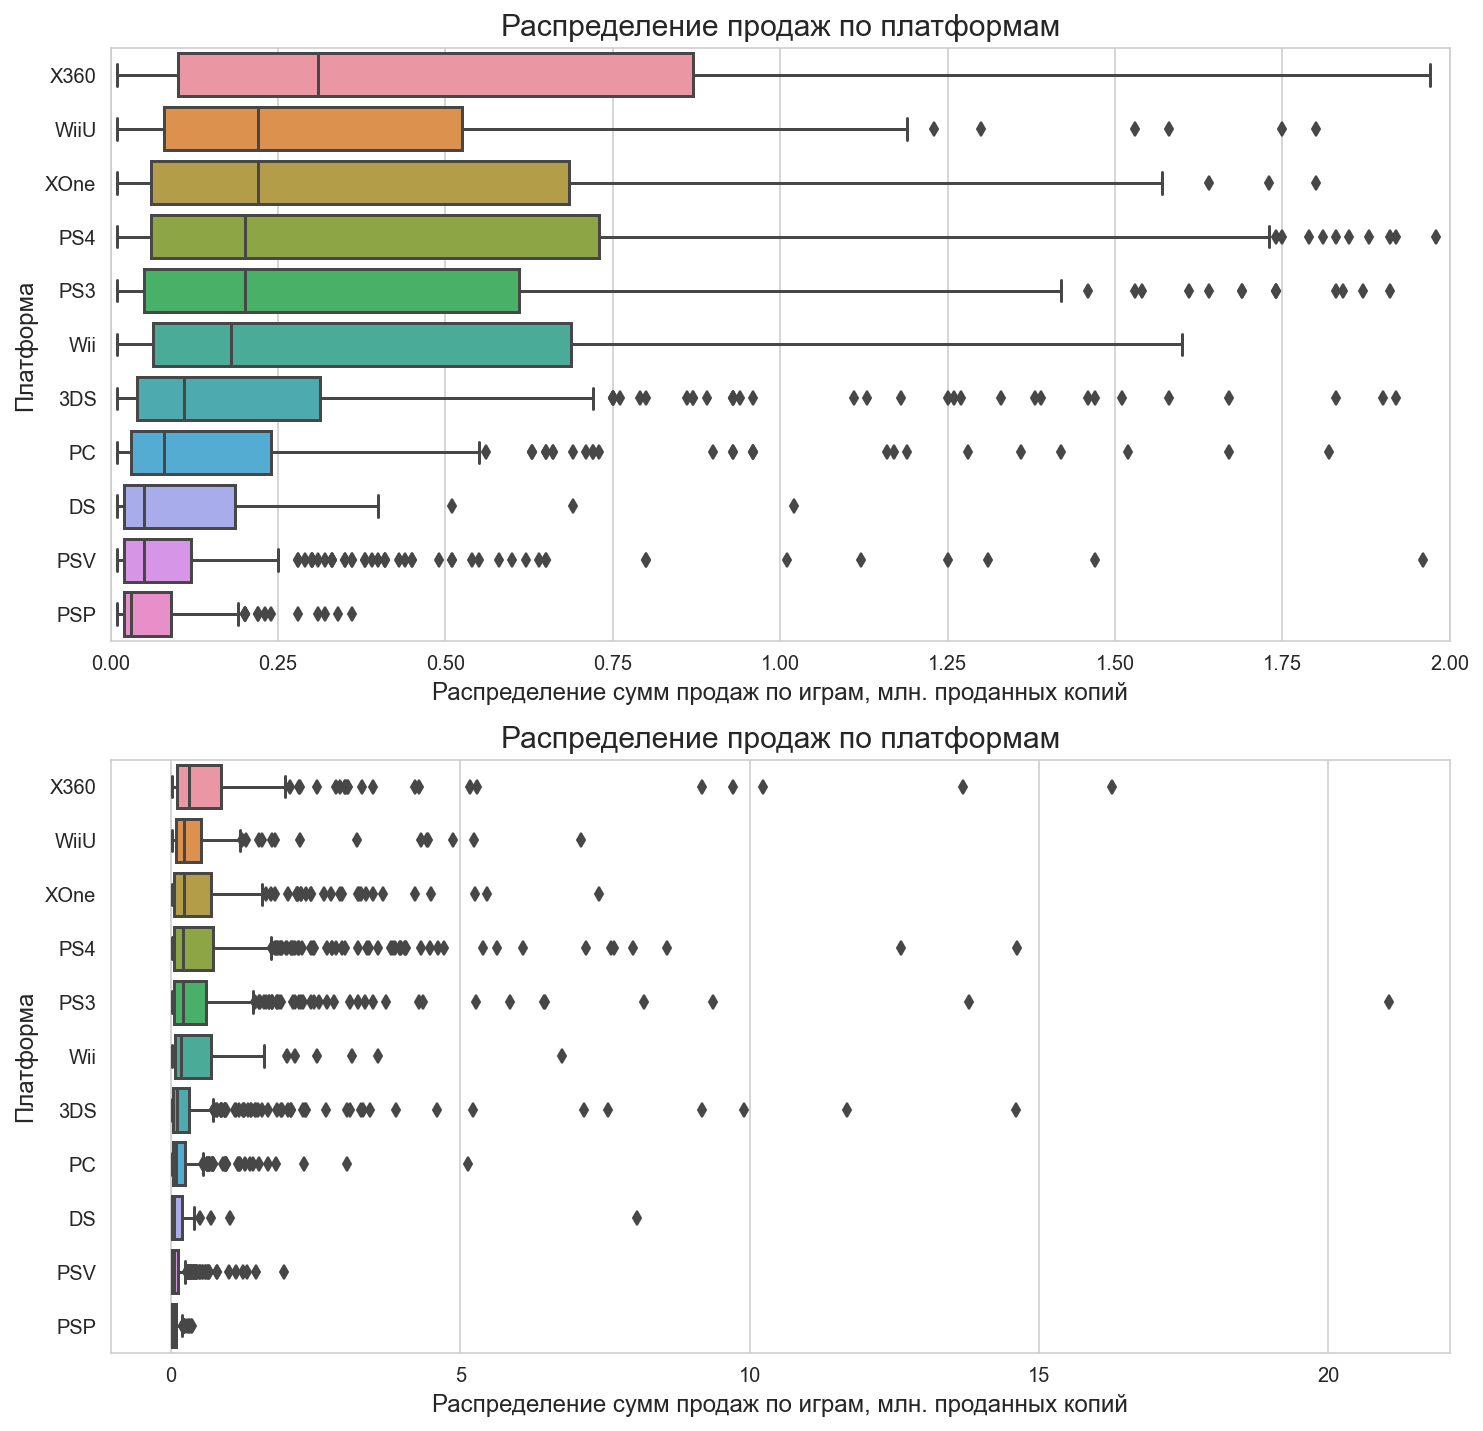

In [34]:
# боксплоты по платформам
plt.figure(figsize=(12,12))

ax1 = plt.subplot(2, 1, 1)
# порядок боксплотов по медиане
platform_order = (df_actual.groupby('platform')['sum_sales'].median()
                  .sort_values(ascending=False).index)
sns.boxplot(data=df_actual,
            x='sum_sales',
            y='platform',
            ax=ax1,
            order=platform_order) # порядок сортировки
plt.xlim(0, 2.0) # ограничим ось X
plt.title('Распределение продаж по платформам', fontsize=15)
plt.xlabel('Распределение сумм продаж по играм, млн. проданных копий', fontsize=12)
plt.ylabel('Платформа',fontsize=12)

ax2 = plt.subplot(2, 1, 2)
sns.boxplot(data=df_actual,
            x='sum_sales',
            y='platform',
            ax=ax2,
            order=platform_order) # порядок сортировки
plt.title('Распределение продаж по платформам', fontsize=15)
plt.xlabel('Распределение сумм продаж по играм, млн. проданных копий', fontsize=12)
plt.ylabel('Платформа',fontsize=12)

plt.show()

* X360 лидер по медианной продаже игры. Несмотря на то что у X360 XOne (Xbox Microsoft) и 3DS (Nintendo) меньше суммарные продажи чем у PS4/PS3, у него по "ящику с усами" у них одни лучшие показатели по медианной продаже по медианной игре. Видимо мало игр на X360, раз общая сумма у PS3/4 больше.
* Самый большой разброс выбросов по продажам у платформ у PS3, X360, PS4, 3DS

### 3.6 Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Соотнести выводы с продажами игр на других платформах.

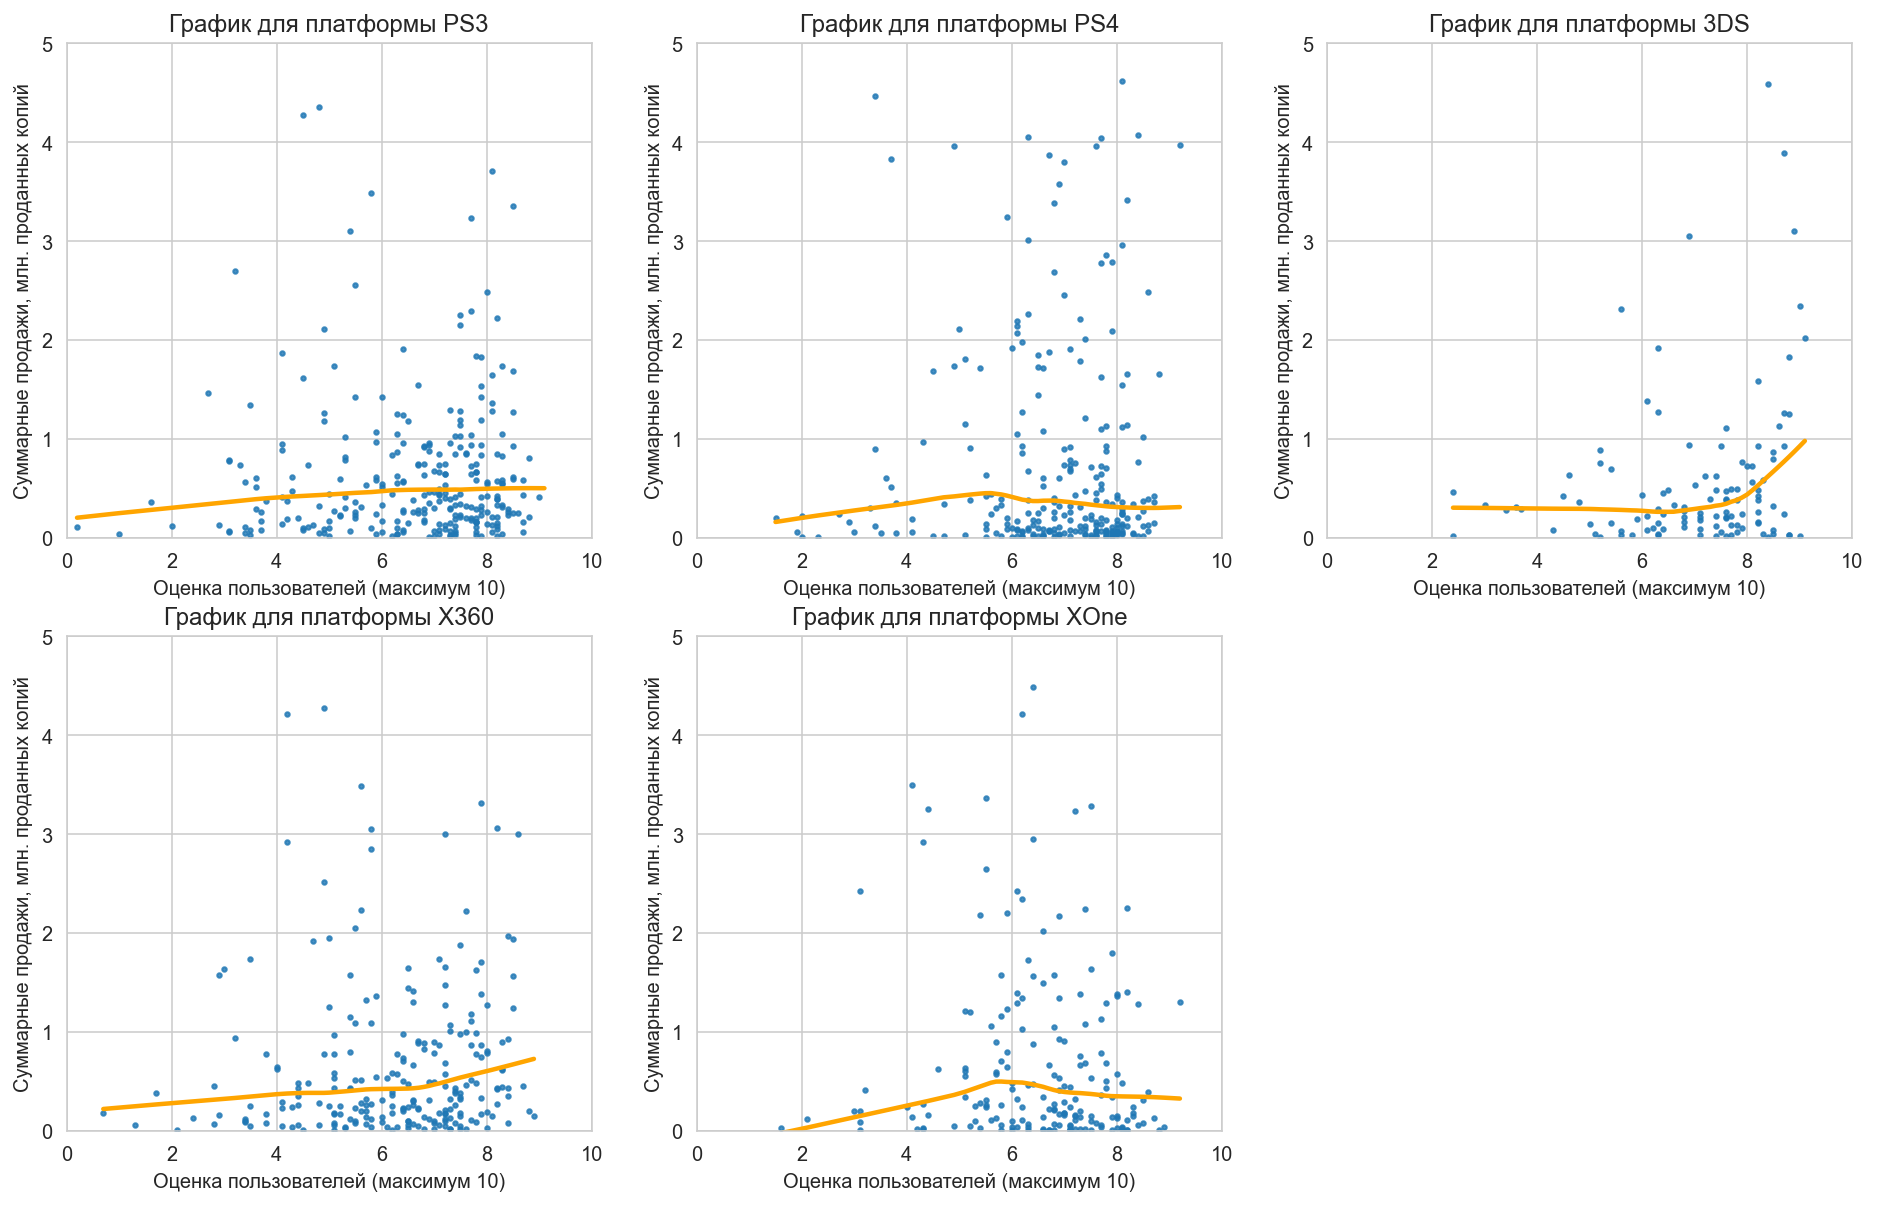

In [35]:
# диаграммы рассеяния Суммарные продажи - оценка пользователей (максимум 10)
plt.figure(figsize=(16,10))
# отберем 4 последние популярные платформы
platforms = ['PS3', 'PS4', '3DS', 'X360', 'XOne']
for i, pl in enumerate(platforms):
    plt.subplot(2, 3, i + 1)
    sns.regplot(data=df_actual.query(f'platform == "{pl}"'),
            x='user_score',
            y='sum_sales',
            lowess=True, # непараметрическая регрессия
            line_kws={'color': 'orange'}, scatter_kws={'s':5})
    plt.xlim(0, 10)
    plt.ylim(0, 5)
    plt.xlabel('Оценка пользователей (максимум 10)')
    plt.ylabel('Суммарные продажи, млн. проданных копий')
    plt.title(f'График для платформы {pl}')
plt.show()

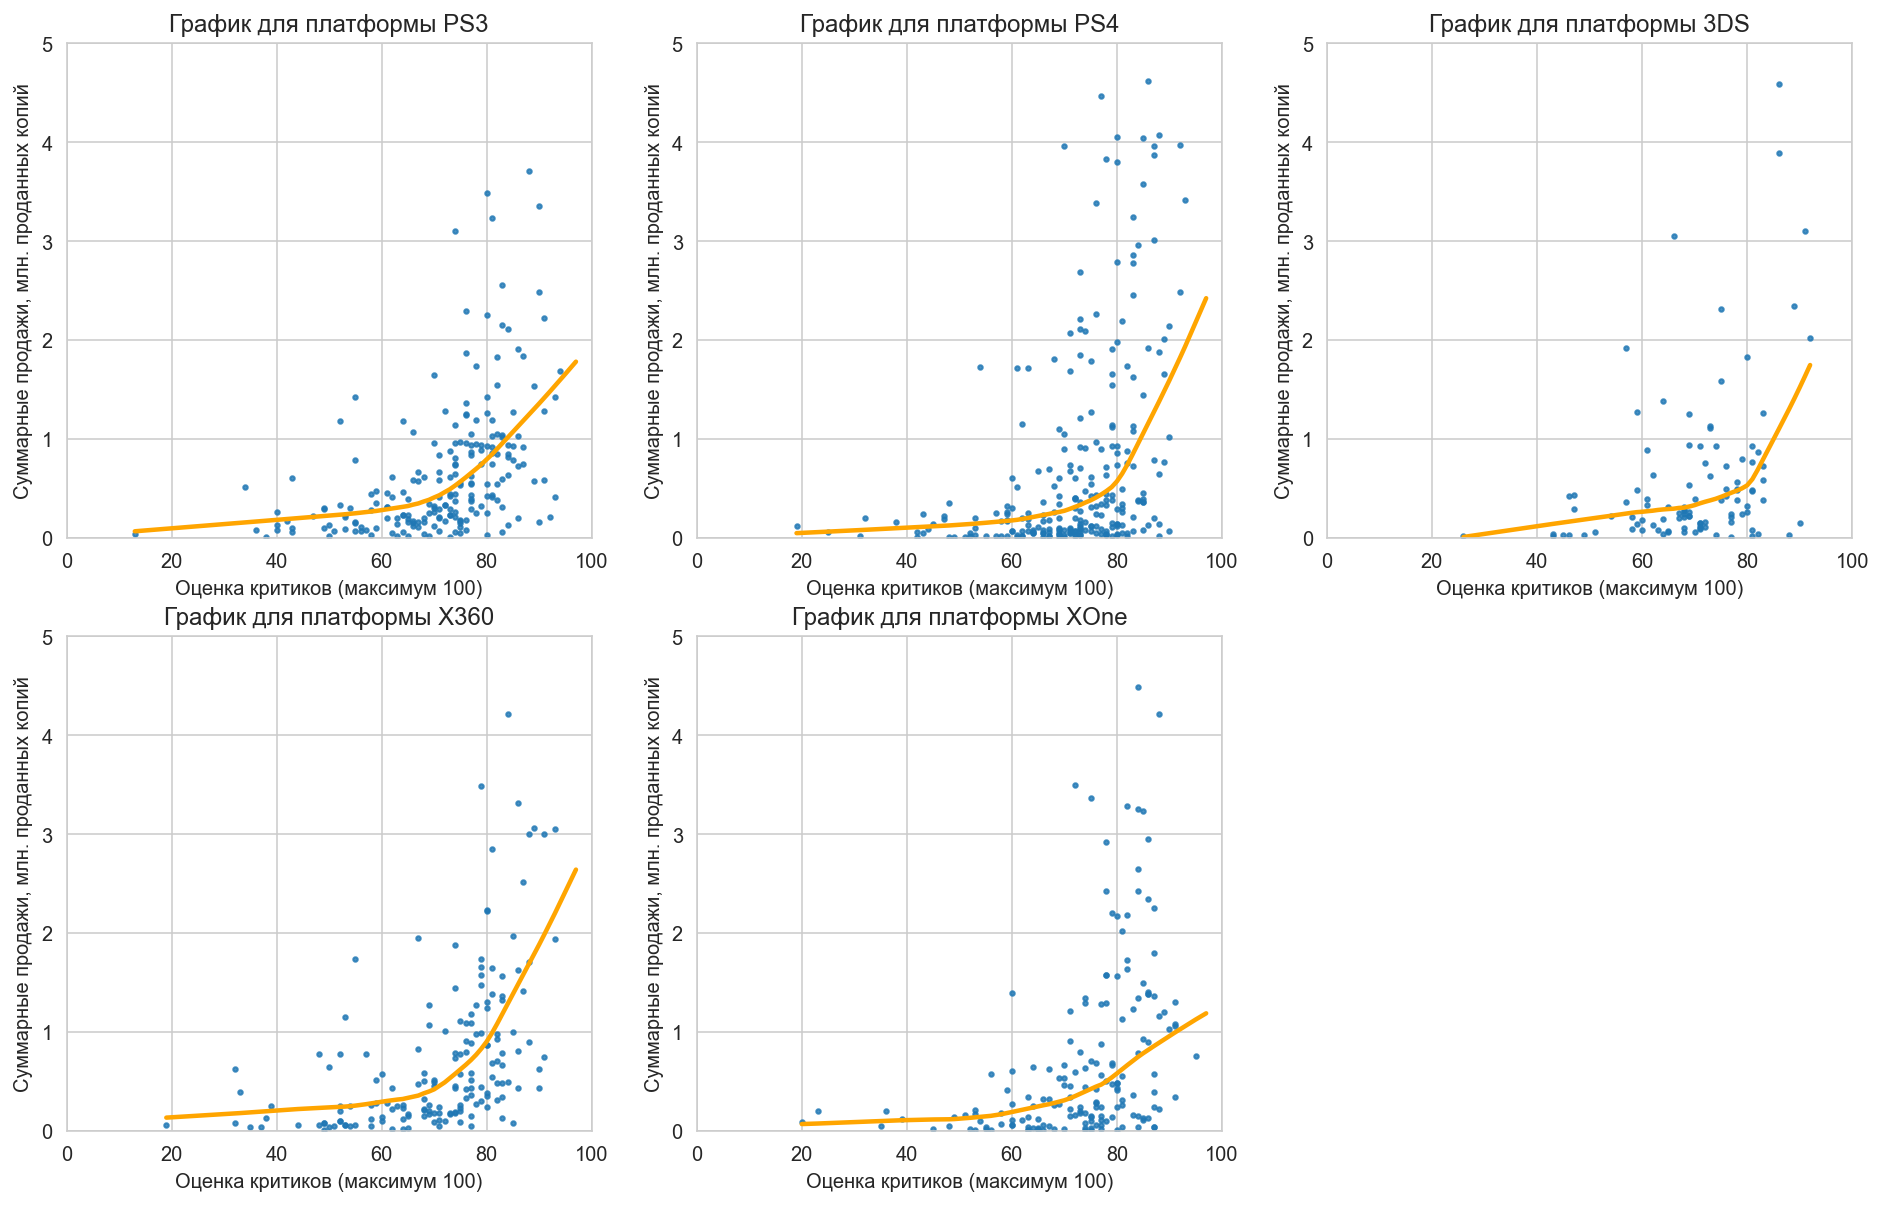

In [36]:
# диаграммы рассеяния Суммарные продажи - Оценка критиков (максимум 100)
plt.figure(figsize=(16,10))
# отберем 4 последние популярные платформы
platforms = ['PS3', 'PS4', '3DS', 'X360', 'XOne']
for i, pl in enumerate(platforms):
    plt.subplot(2, 3, i + 1)
    sns.regplot(data=df_actual.query(f'platform == "{pl}"'),
            x='critic_score',
            y='sum_sales',
            lowess=True, # непараметрическая регрессия
            line_kws={'color': 'orange'}, scatter_kws={'s':5})
    plt.xlim(0, 100)
    plt.ylim(0, 5)
    plt.xlabel('Оценка критиков (максимум 100)')
    plt.ylabel('Суммарные продажи, млн. проданных копий')
    plt.title(f'График для платформы {pl}')
plt.show()

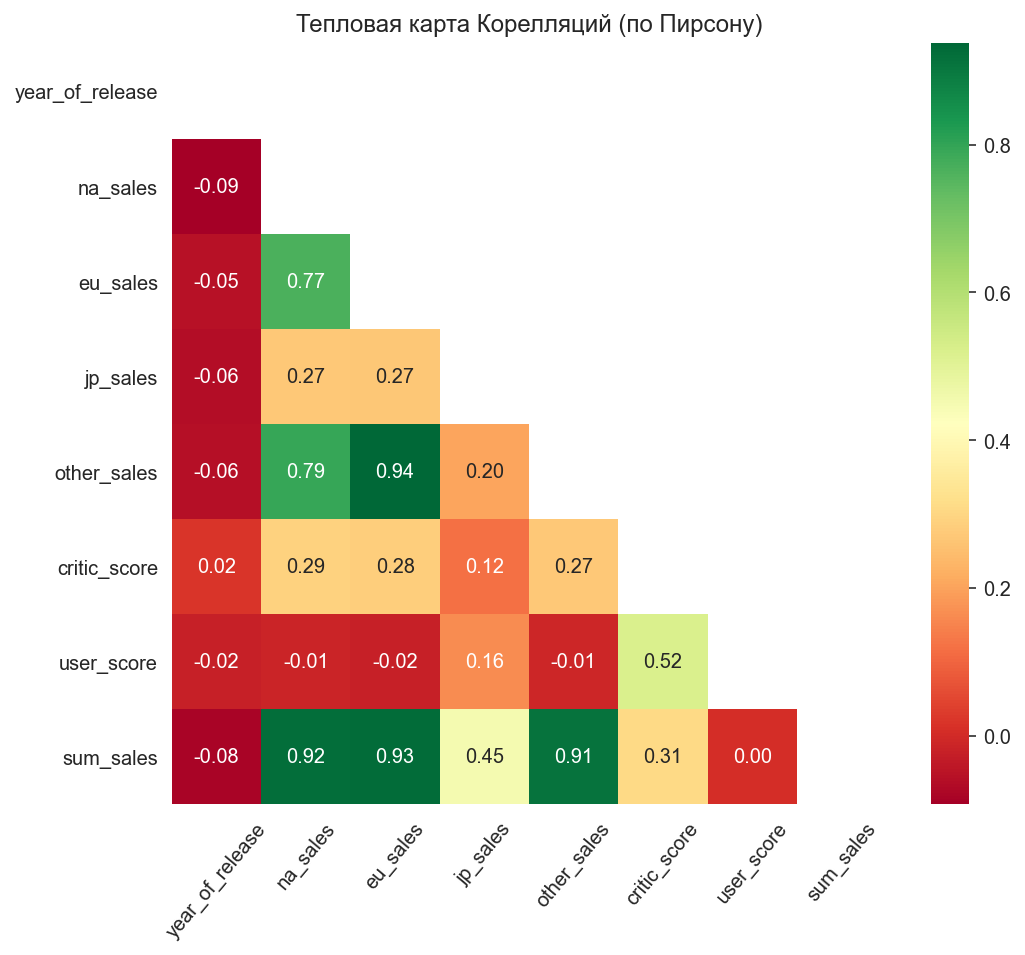

In [37]:
# по Пирсону, по умолчанию
# ищет линейную зависимость у количественных переменных
plt.figure(figsize=(8,7))
sns.heatmap(df_actual.corr(method='pearson'), annot=True, cmap='RdYlGn', fmt='.2f',
            mask=np.triu(df1.corr())) # .2f-2цифры
plt.xticks(rotation=50)
plt.title('Тепловая карта Корелляций (по Пирсону)')
plt.show()

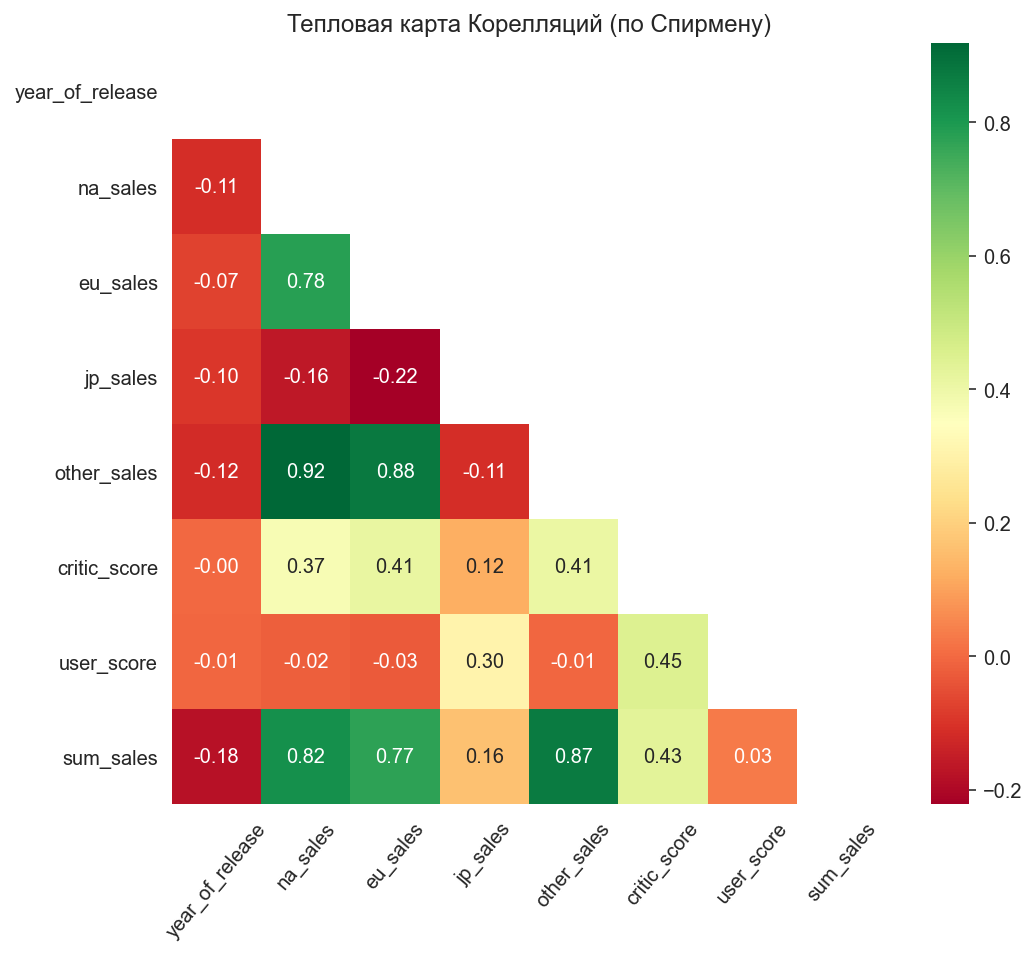

In [38]:
# по Спирмену, ищет монотонную зависимость
# у количественных переменных, непараметрический метод
plt.figure(figsize=(8,7))
sns.heatmap(df_actual.corr(method='spearman'), annot=True, cmap='RdYlGn', fmt='.2f',
            mask=np.triu(df1.corr())) # .2f-2цифры
plt.xticks(rotation=50)
plt.title('Тепловая карта Корелляций (по Спирмену)')
plt.show()

По спирмену более ярко-выражаенная оценки - суммы

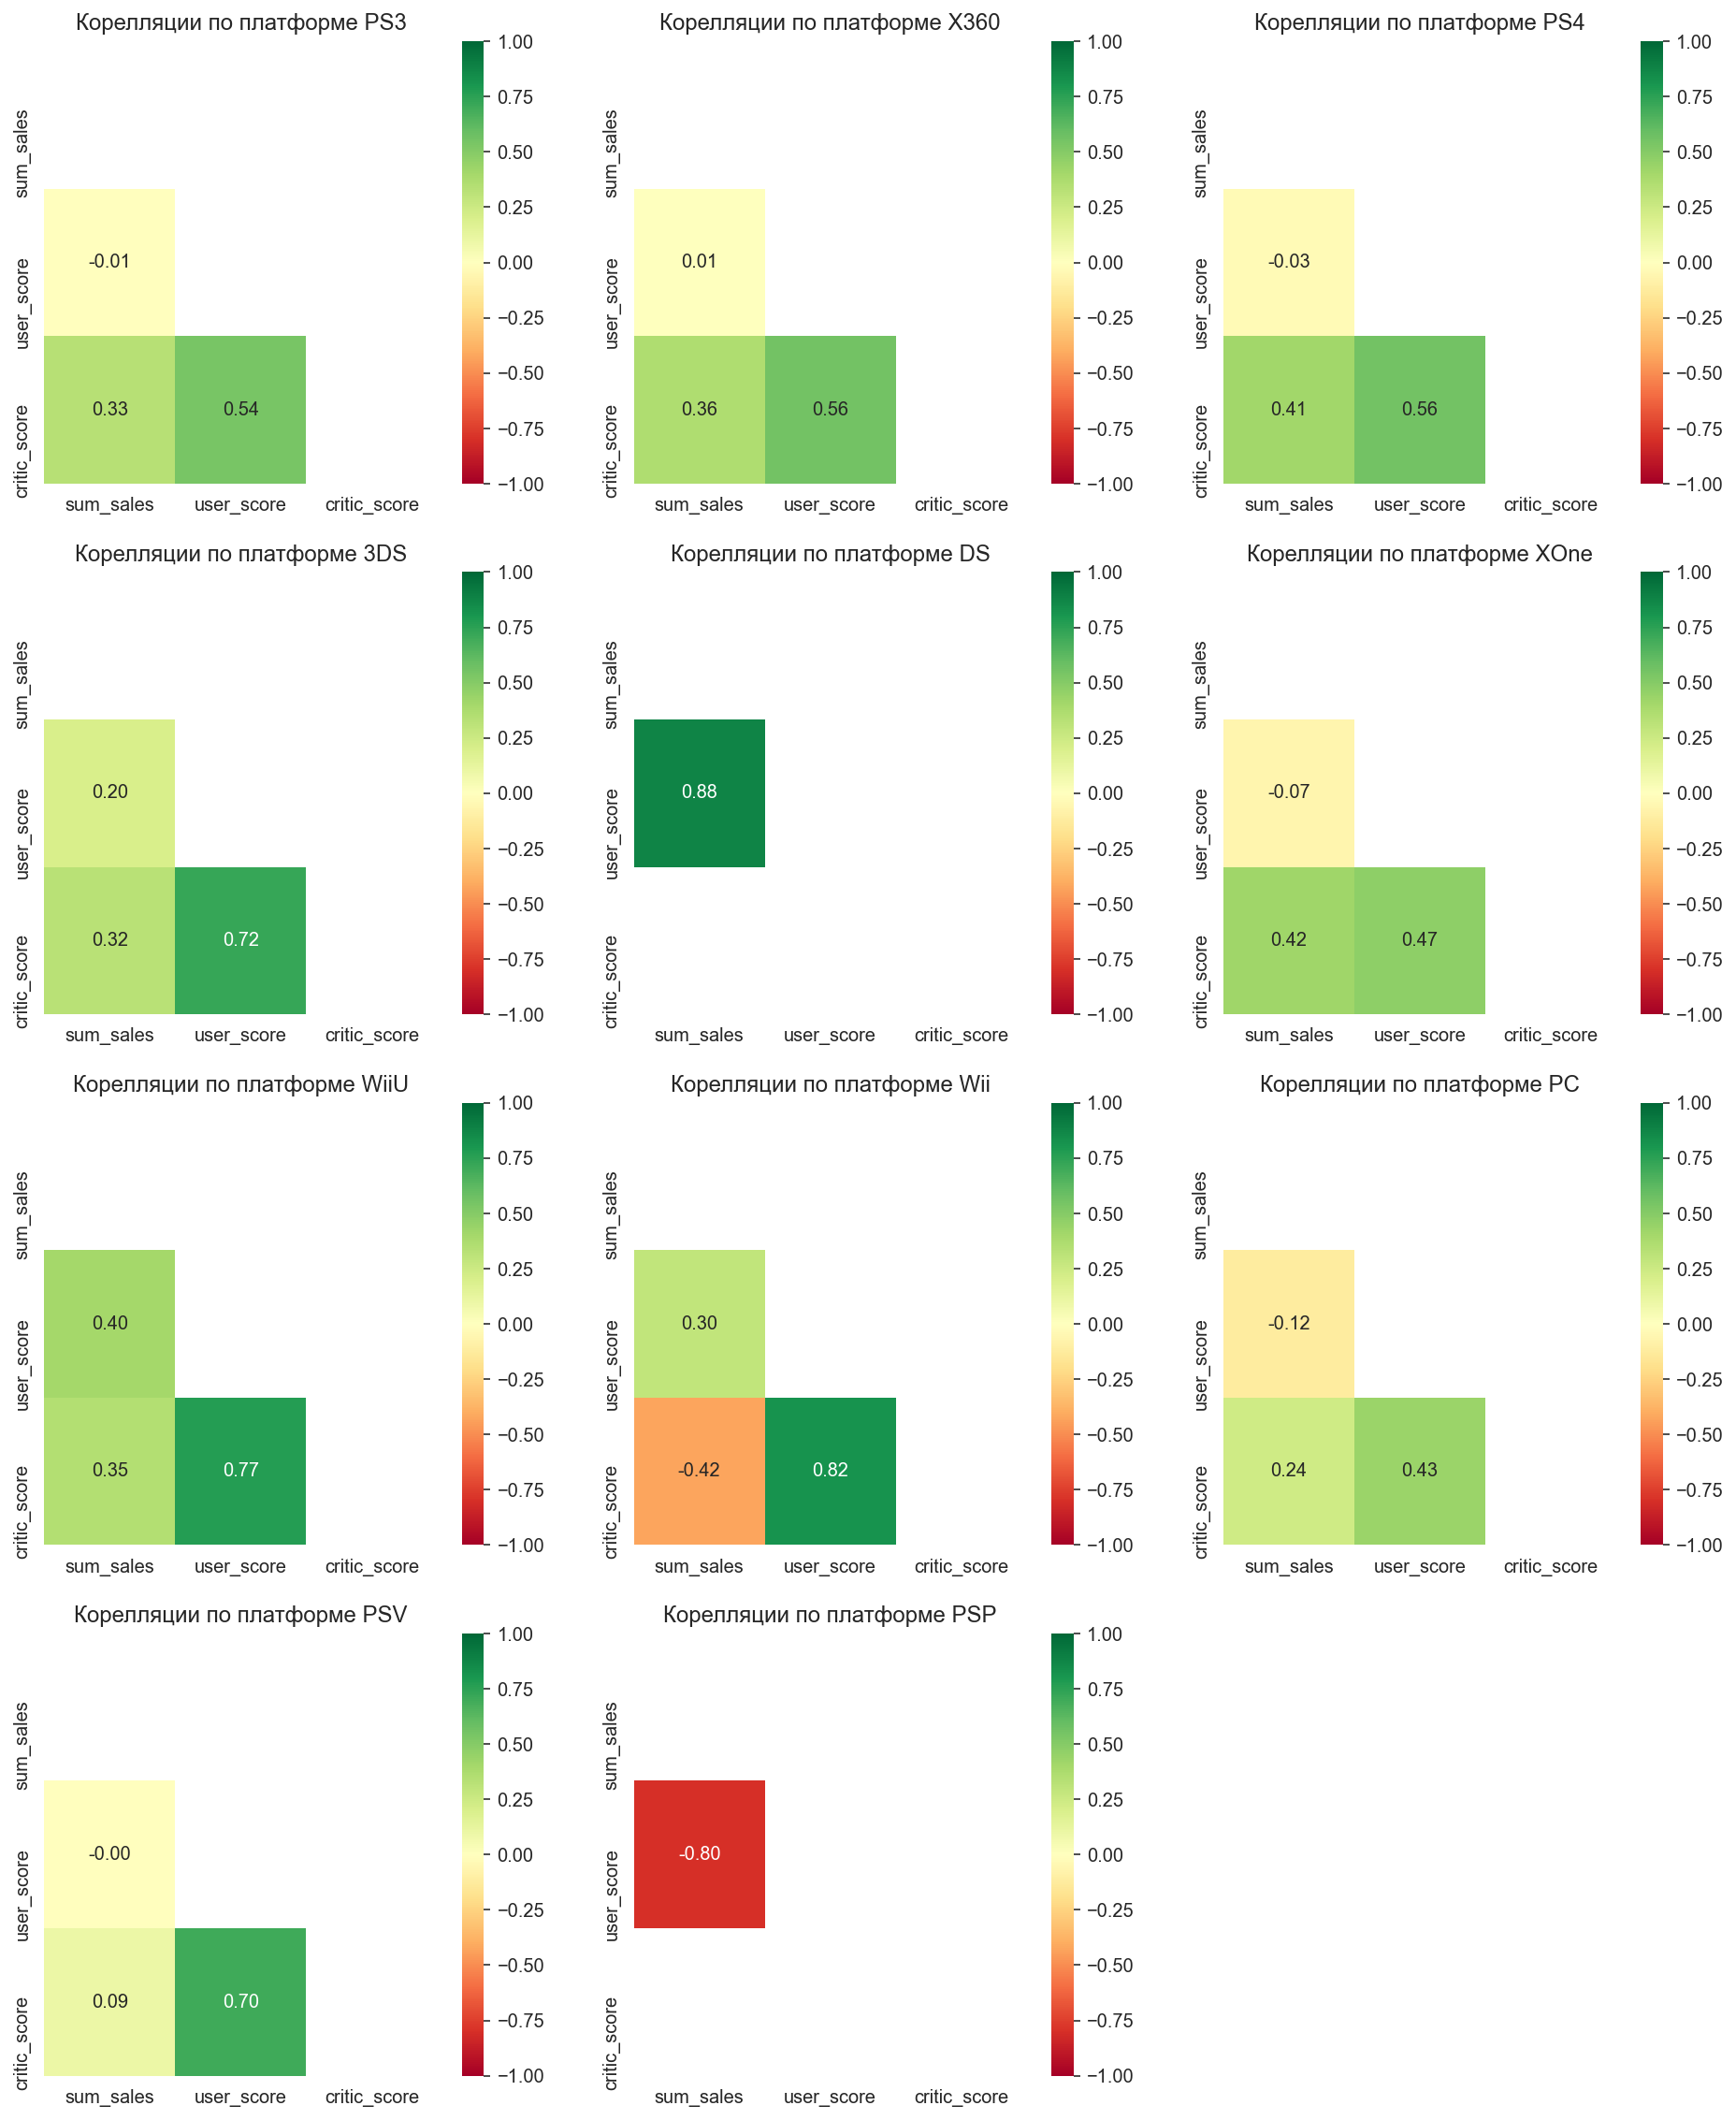

In [39]:
# посмотрим корелляции оценки - суммы
pl_un = df_actual['platform'].unique()

plt.figure(figsize=(16, 20))
for i, pl in enumerate(pl_un, 1):
    platform_data = df_actual[df_actual['platform'] == pl][['platform', 'sum_sales', 'user_score', 'critic_score']]
    plt.subplot(4, 3, i)
    # построим корелляции
    sns.heatmap(platform_data.corr(), annot=True, cmap='RdYlGn', fmt='.2f', vmin=-1, vmax=1,
            mask=np.triu(platform_data.corr()))
    plt.title(f'Корелляции по платформе {pl}')
plt.show()

* Корелляция Суммарные продажи - Оценка пользователей (максимум 10) -Слабая почти нет. Только на редких платформах можно её заметить напрмер на 3DS и немного на X360 чем выше рейтинг тем больше продажи.
* Корелляция Суммарные продажи - Оценка критиков (максимум 100) -Средняя(умеренная), сильнее проявляется при высоких оценках, чем выше оценка - тем выше продажи.
* По отдельным платформам, у некоторых есть корелляция, в основном по оц.критиков:
    * 'DS'(0.88 - оц.польователей, высокая)
    * 'WiiU' (0.4 - оц.польователей, 0.35-оц.критиков)
    * 'XOne' (-0.07 - оц.польователей, 0.42-оц.критиков),
    * 'PS4'(-0.03 - оц.польователей, 0.41-оц.критиков),
    * 'X360'(-0.03 - оц.польователей, 0.36-оц.критиков)
    * 'PS3'(-0.01 - оц.польователей, 0.33-оц.критиков),
    * 'PC' (-0.12 - оц.польователей, 0.24-оц.критиков),


* По критикам даже есть отрицательные корелляции (чем ниже оценка критиков/пользователей тем больше продажи): 
    * 'PSP' (-0.80 - оц.польователей, высокая отрицательная)
    * 'Wii' (0.3 - оц.польователей, -0.42-оц.критиков)
    * 'Wii' (0.30 - оц.польователей, -0.42-оц.критиков)
    
    * У остальных платформ практически нет корелляции.

### 3.7 Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

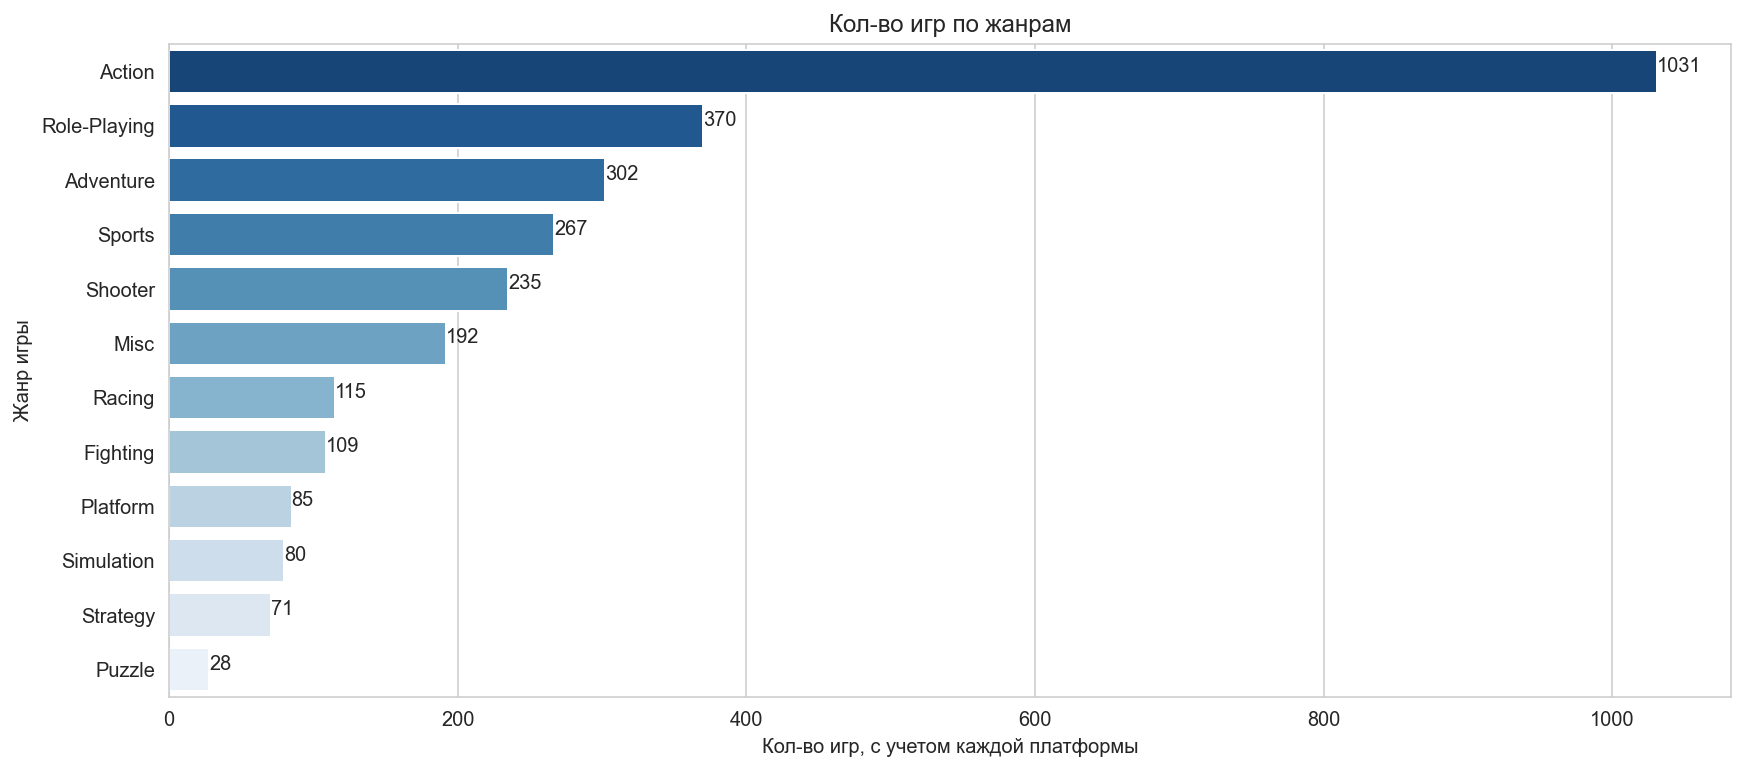

In [40]:
# посчитаем кол-во игр по Жанрам с сортировкой
plt.figure(figsize=(14, 6))
sns.countplot(y=df_actual['genre'],
              palette='Blues_r',
              order=df_actual['genre'].value_counts().index # порядок сортировки
              )
# надписи числовые
for y, x in enumerate(df_actual['genre'].value_counts()):
    plt.text(x, y, f'{x:.0f}', fontsize=10)
plt.title('Кол-во игр по жанрам')
plt.xlabel('Кол-во игр, с учетом каждой платформы')
plt.ylabel('Жанр игры')
plt.show()

In [41]:
# группируем па жанрам - суммарные продажи и кол-во
# * для 1ой игры-жанра может быть несколько платформ
# * поэтому count посчитает их как за несколько
# * в среднем не сильно должно повлиять
df1_genre = (df_actual.
             groupby('genre', as_index=False)
             .agg(sum_sales_total =('sum_sales', 'sum'),
                  sum_sales_count =('sum_sales', 'count'))
             .sort_values(by='sum_sales_total', ascending=False)
            )

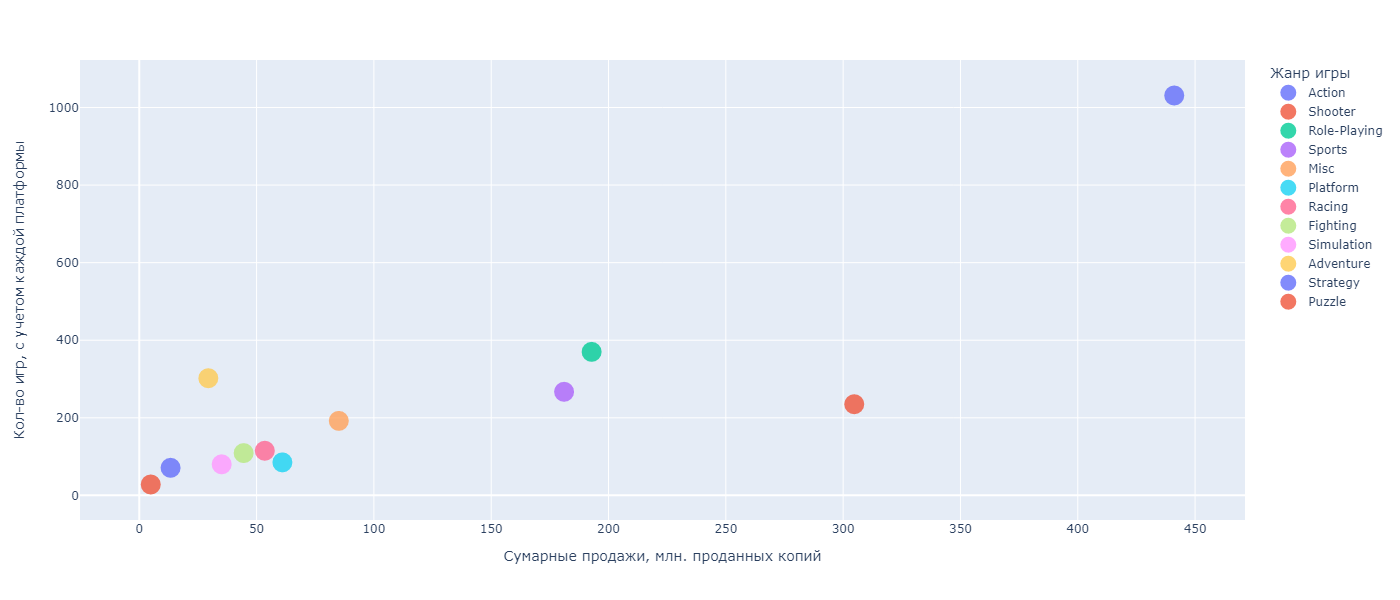

In [42]:
# строим plotly scatter
fig = px.scatter(df1_genre,
                 x='sum_sales_total',
                 #range_x=[-10, 500], # ограничиваем ось X
                 y='sum_sales_count',
                 color='genre',
                 hover_name='genre',
                 size_max=100,
                 opacity=0.8,
                 width=1400, height=600
                 )
# добавляем надписи
fig.update_layout(title='',
                   xaxis_title='Сумарные продажи, млн. проданных копий',
                   yaxis_title='Кол-во игр, с учетом каждой платформы',
                   legend_title='Жанр игры')
fig.update_traces(marker_size=20)
fig.show()

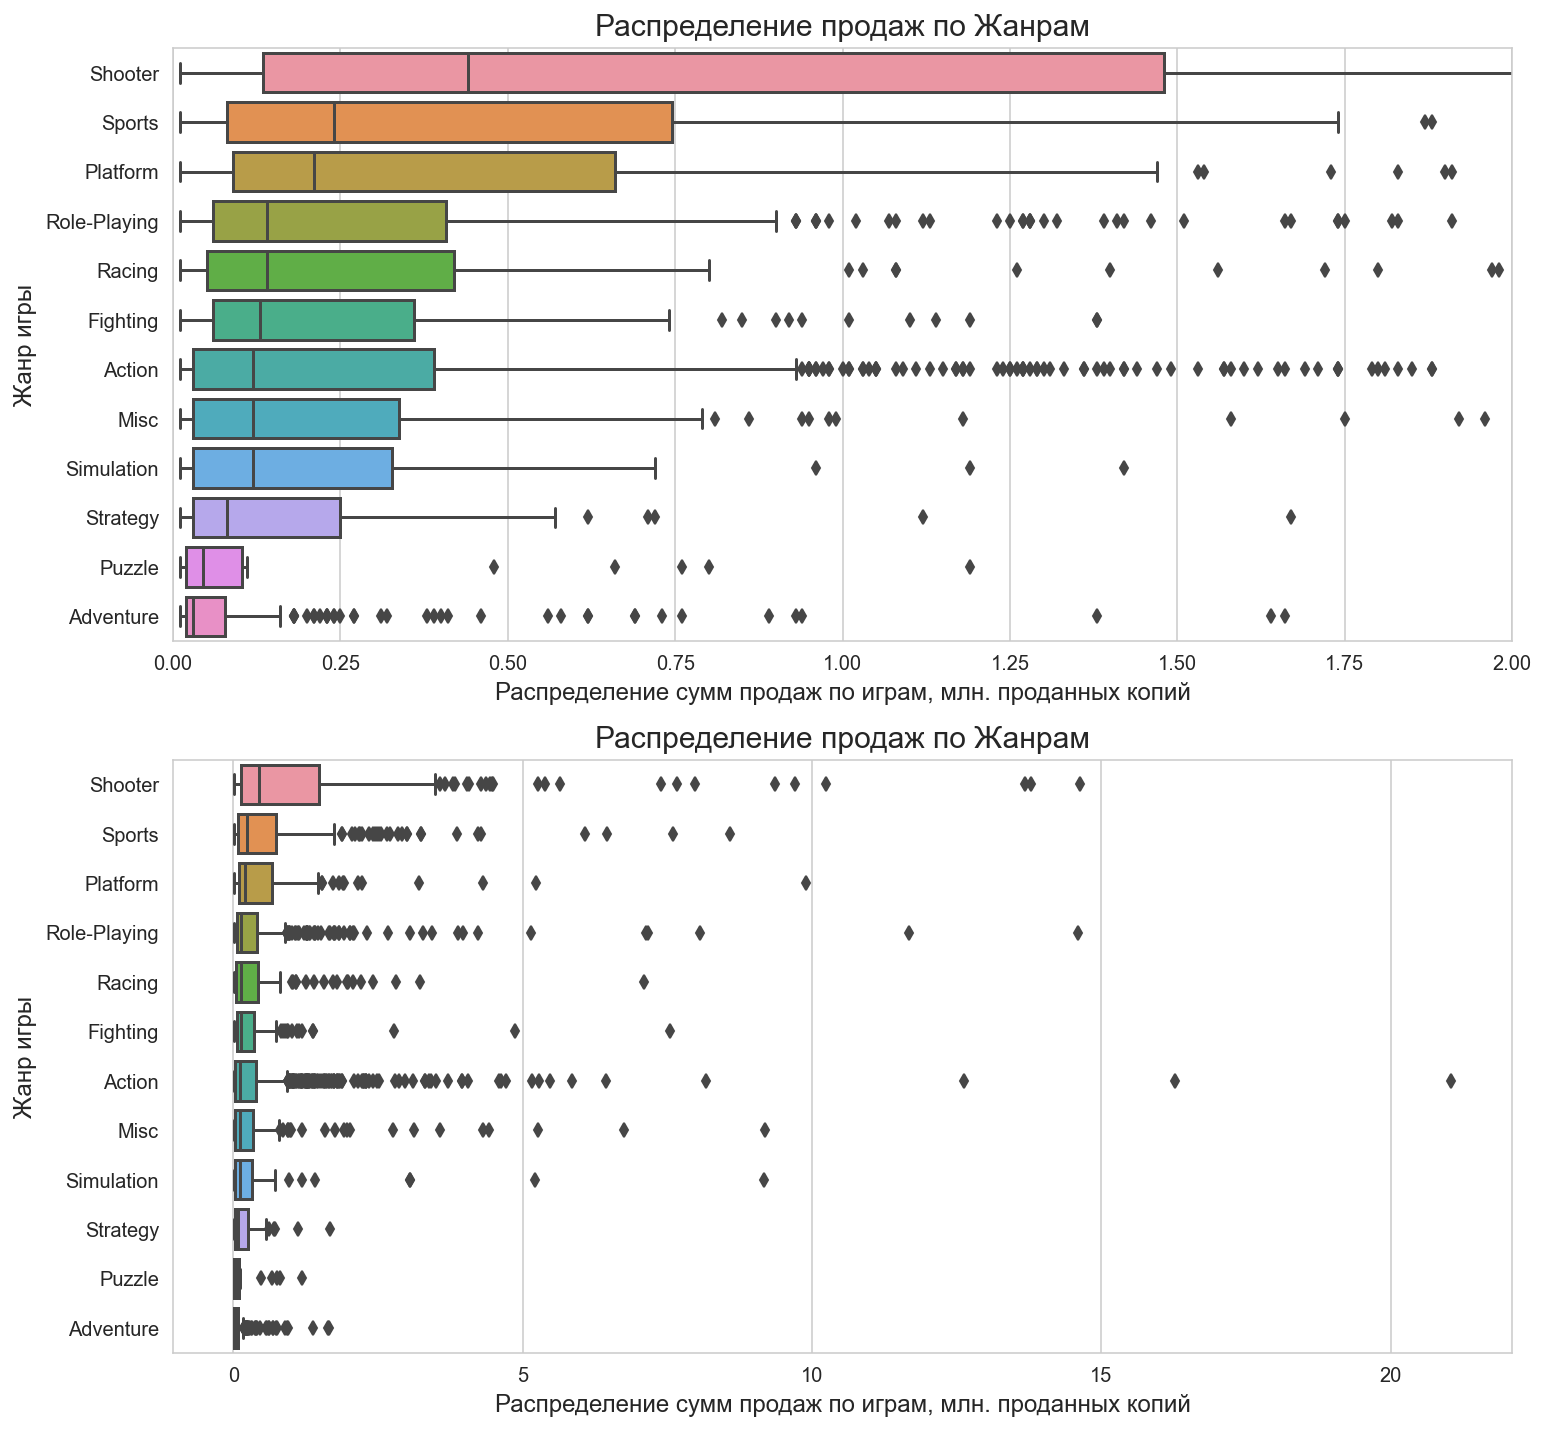

In [43]:
# добавим боксплоты/диаграммы размаха по жанрам
plt.figure(figsize=(12,12))

ax1 = plt.subplot(2, 1, 1)
# порядок боксплотов по медиане
platform_order = (df_actual.groupby('genre')['sum_sales'].median()
                  .sort_values(ascending=False).index)
sns.boxplot(data=df_actual,
            x='sum_sales',
            y='genre',
            ax=ax1,
            order=platform_order) # порядок сортировки
plt.xlim(0, 2.0) # ограничим ось X
plt.title('Распределение продаж по Жанрам', fontsize=15)
plt.xlabel('Распределение сумм продаж по играм, млн. проданных копий', fontsize=12)
plt.ylabel('Жанр игры',fontsize=12)

ax2 = plt.subplot(2, 1, 2)
sns.boxplot(data=df_actual,
            x='sum_sales',
            y='genre',
            ax=ax2,
            order=platform_order) # порядок сортировки
plt.title('Распределение продаж по Жанрам', fontsize=15)
plt.xlabel('Распределение сумм продаж по играм, млн. проданных копий', fontsize=12)
plt.ylabel('Жанр игры',fontsize=12)

plt.show()

* У жанра Action хоть и большее кол-во игр и большее кол-во продаж, но по медианной продаже игры он на 7ом месте. Action популярный и у него самые большие выбросы по диаграмме размаха, но далеко не все игры у него выстреливают.
* Самый стабильный жанр с наивысшей медианой и большим отрывом - Shooter, на 2ом и 3ем месте Sports и Platform.
* Самые низкие медианные продажи у Strategy, Puzzle и самые низкие у Adventure, хотя у Adventure по кол-ву игр на 3ем месте.

## 4. Составить портрет пользователя каждого региона

### 4.1 Самые популярные платформы (топ-5). Описать различия в долях продаж.
Определить для пользователя каждого региона (NA, EU, JP).

In [44]:
# по кол-ву млн. проданных копий
df_platform_sales = (df_actual.groupby('platform', as_index=False)\
                     [['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].sum()
                     .sort_values(by='sum_sales', ascending=False)
                    )

In [45]:
# отберем топ 5 платформ по каждому региону, выберем уникальные
# для всех регионов и отфильтруем таблицу по этим платформам
top_platform = []
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']:
    top_platform += (list(df_platform_sales.nlargest(5, i)['platform']))
top_platform = list(set(top_platform)) # отберем уникальные

In [46]:
# добавим доли
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']:
    sales_share = i + '_%'
    df_platform_sales[sales_share] = round((df_platform_sales[i] / df_platform_sales[i].sum())*100).astype(int)

In [47]:
df_platform_sales = round(df_platform_sales.query('platform == @top_platform'),1)
# новый порядок
(df_platform_sales[['platform',
     'na_sales', 'na_sales_%',
     'eu_sales', 'eu_sales_%',
     'jp_sales', 'jp_sales_%',
     'other_sales', 'other_sales_%',
     'sum_sales', 'sum_sales_%']]
 .style.background_gradient(cmap='Oranges', high = 1, axis=0) # раскрасим
 .set_precision(1)
)

,platform,na_sales,na_sales_%,eu_sales,eu_sales_%,jp_sales,jp_sales_%,other_sales,other_sales_%,sum_sales,sum_sales_%
4,PS4,108.7,18,141.1,28,16.0,8,48.3,31,314.1,22
3,PS3,103.4,17,106.8,21,35.3,18,43.3,28,288.8,20
9,X360,140.1,24,74.5,15,1.6,1,20.4,13,236.5,16
0,3DS,55.3,9,42.6,8,87.8,46,8.9,6,194.6,13
10,XOne,93.1,16,51.6,10,0.3,0,14.3,9,159.3,11
8,WiiU,38.1,6,25.1,5,13.0,7,5.9,4,82.2,6
6,PSV,11.0,2,11.4,2,21.0,11,5.8,4,49.2,3


In [48]:
# по кол-ву уникальных игр 'name' на платформах
(df_actual.groupby('platform', as_index=False)['name'].count()
 .sort_values(by='name', ascending=False)
 .head(10)
)

,platform,name
3,PS3,492
6,PSV,411
0,3DS,396
4,PS4,392
9,X360,292
2,PC,250
10,XOne,247
5,PSP,173
8,WiiU,147
7,Wii,54


Самые популярные платформы за период с 2012-2016года (5лет) по регионам:
* NA (Северная Америка): X360(24%), PS4(18%), PS3(17%), XOne(16%). Лидирует своя Xbox (Microsoft) и Японская PS2 PlayStation (Sony).
* EU (Европа): PS4(28%), PS3(21%), X360(15%). Лидируют PS4 PS3 PlayStation (Sony).
* JP (Япония): 3DS(46%!) (Nintendo), PS3(18%). В Японии топ1 c большим это своя же консоль Nintendo, и далее своя же PS3 PlayStation(Sony).
* Также по количеству Уникальных игр на платформах лидирует PS3 (PlayStation Sony).

### 4.2 Самые популярные жанры (топ-5). Разница?
Определить для пользователя каждого региона (NA, EU, JP).

In [49]:
# по кол-ву млн. проданных копий
df_genre_sales = (df_actual.groupby('genre', as_index=False)\
                     [['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].sum()
                     .sort_values(by='sum_sales', ascending=False)
                    )

# отберем топ 5 жанров по каждому региону, выберем уникальные
# для всех регионов и отфильтруем таблицу по этим платформам
top_genre = []
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']:
    top_genre += (list(df_genre_sales.nlargest(5, i)['genre']))
top_genre = list(set(top_genre)) # отберем уникальные

# добавим доли
for i in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']:
    sales_share = i + '_%'
    df_genre_sales[sales_share] = round((df_genre_sales[i] / df_genre_sales[i].sum())*100).astype(int)
    
df_genre_sales = round(df_genre_sales.query('genre == @top_genre'),1)
# новый порядок
(df_genre_sales[['genre',
     'na_sales', 'na_sales_%',
     'eu_sales', 'eu_sales_%',
     'jp_sales', 'jp_sales_%',
     'other_sales', 'other_sales_%',
     'sum_sales', 'sum_sales_%']]
 .style.background_gradient(cmap='Oranges', high = 1, axis=0) # раскрасим
 .set_precision(1)
)

,genre,na_sales,na_sales_%,eu_sales,eu_sales_%,jp_sales,jp_sales_%,other_sales,other_sales_%,sum_sales,sum_sales_%
0,Action,177.8,30,159.3,31,52.8,27,51.1,33,441.1,30
8,Shooter,144.8,24,113.5,22,9.2,5,37.3,24,304.7,21
7,Role-Playing,64.0,11,48.5,10,65.4,34,14.8,9,192.8,13
10,Sports,81.5,14,69.1,14,8.0,4,22.4,14,181.1,13
3,Misc,38.2,6,26.3,5,12.9,7,7.7,5,85.0,6
6,Racing,17.2,3,27.3,5,2.5,1,6.5,4,53.5,4
2,Fighting,19.8,3,10.8,2,9.4,5,4.5,3,44.5,3
9,Simulation,8.0,1,14.5,3,10.4,5,2.2,1,35.1,2


Самые популярные жанры за все время по регионам:
* NA (Северная Америка): Action(30%), Shooter(24%), Sports(14%).
* EU (Европа):Action(31%), Shooter(22%), Sports(14%). Топ Америки и Европы 1в1 похож даже в процентах долей: Action, Shooter, Sports.
* JP (Япония): Role-Playing(34%), Action(27%). В Японии топ1 с большим отрывом это ролевые игры Role-Playing, далее идет Action.

### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Определить для пользователя каждого региона (NA, EU, JP).

In [50]:
# Рейтинг по кол-ву млн. проданных копий
(df_actual.groupby('rating', as_index=False)
 [['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].sum()
 .sort_values(by='sum_sales', ascending=False)
 .style.background_gradient(cmap='Oranges', high = 0.2, axis=0) # раскрасим
 .set_precision(1)
)

,rating,na_sales,eu_sales,jp_sales,other_sales,sum_sales
2,M,231.6,194.0,21.2,63.4,510.1
3,NAN,103.3,91.5,108.8,27.2,330.8
0,E,114.4,113.0,28.3,31.4,287.2
4,T,66.0,53.0,26.0,17.9,162.9
1,E10+,75.7,55.4,8.2,16.2,155.5


* Топ популярных рейтингов по регионам: 
(*В рейтинге от организации ESRB у нас есть ппропуски, поэтому вывод про влияние рейтинга по регионам может быть не очень корректный. ESRB - рейтинг для США и Канады. Вероятнее всего, что пропуски в рейтингах 'Rating' является признаком, что игры выпущены не в США/Канаде, а например в Японии/Европе)
    * NA (Северная Америка): M(17+), E(6+). Для молодежи + для всех, это охватывает более широкую аудиторию.
    * EU (Европа): M(17+), E(6+). Также как для Северной Америки.
    * JP (Япония): В топе с большим отрывом пропуски NAN, это маркер что эти игры выпущены в Японии и на них нет рейтинга США.
    * Во всех странах в теч. последних 5 лет вообще нет продаж по рейтингам EC(3+), AO(18+). Для слишком маленьких и для сильно взрослыx не выгодно делать игры, нужна более широкая аудитория.

## 5. Проверить гипотезы

###  5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
```
Зададим гипотезы:
H_0 (нулевая гипотеза): Средние оценки пользователей (user_score) платформ "XOne" и "PC" - Равны.
H_A (альтер-ая гипотеза): Средние оценки пользователей (user_score) платформ "XOne" и "PC" - НЕ равны.
alpha = 0.05

Для проверки этих гипотез был выбран t-критерий. Выбор t-критерия обоснован следующими причинами:
- Мы сравниваем средние значения двух независимых выборок для одной и той же переменной (средние оценки пользователей).
- Мы не знаем дисперсию в генеральной совокупности, поэтому используем t-критерий для работы с выборочными данными.
- T-критерий подходит для сравнения средних значений двух выборок и позволяет определить, являются ли различия между средними статистически значимыми или случайными.
```

In [51]:
# посчитаем сколько у нас каждой платформы в датафрейме
(df_actual.query('platform == "XOne" or platform == "PC"')[['platform', 'user_score']]
 .dropna() # удалим пропуски рейтинга
 .value_counts('platform')
)

platform
PC      206
XOne    182
dtype: int64

Для проверки этих гипотез был выбран t-критерий. Выбор t-критерия обоснован следующими причинами:

- Мы сравниваем средние значения двух независимых выборок для одной и той же переменной (средние оценки пользователей).
- Мы не знаем дисперсию в генеральной совокупности, поэтому используем t-критерий для работы с выборочными данными.
- T-критерий подходит для сравнения средних значений двух выборок и позволяет определить, являются ли различия между средними статистически значимыми или случайными.

Рейтингов для XOne и PC почти одинаковы по кол-ву.

In [52]:
# отфильтруем две выборки
user_score_xone = df_actual.query('platform == "XOne"')[['user_score']].dropna()
user_score_pc = df_actual.query('platform == "PC"')[['user_score']].dropna()

# вызов метода для проверки гипотезы
result = st.ttest_ind(user_score_xone,
                     user_score_pc,
                     equal_var=False) # t-критерий Уэлча, разные дисперсии

# уровень статистической значимости
alpha = 0.05

# вывод значений p-value
print('p-value:', result.pvalue)

# проверка нулевой гипотезы:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

print(f'Средний пользовательский рейтинг платформы Xbox One: {(user_score_xone.mean().values[0]):.3f}')
print(f'Средний пользовательский рейтинг платформы PC: {(user_score_pc.mean().values[0]):.3f}')

p-value: [0.5489538]
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Средний пользовательский рейтинг платформы Xbox One: 6.521
Средний пользовательский рейтинг платформы PC: 6.429


In [53]:
# Это ради интереса тест
# проверим нужный ли у нас размер выборки?

# Вычисление средних значений
mu_experiment = np.mean(user_score_xone)
mu_control = np.mean(user_score_pc)
# Вычисление стандартных отклонений
sigma_experiment = np.std(user_score_xone, ddof=1)  # ddof=1 для вычисления несмещенной оценки
sigma_control = np.std(user_score_pc, ddof=1)

effect_size_d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5
print('Ожидаемый эффект Cohen"s d:', round(effect_size_d.values[0], 3))

# Маленький: d = 0.2 - большой размер выборки
# Средний: d = 0.5
# Большой: d = 0.8 - малый размер выборки
alpha = 0.05  # Уровень значимости
power = 0.9  # 0.8-0.9 Уровень мощности
ratio = round(len(user_score_xone) / len(user_score_pc), 2)   # Отношение размеров выборок (n1/n2)
print('Отношение размеров выборок (n1/n2):', ratio)

# экземпляр класса TTestIndPower() для анализа мощности теста для независимых выборок
power_analysis = TTestIndPower()
# определим необходимый размер выборки
sample_size = power_analysis.solve_power(effect_size=effect_size_d.values[0], alpha=alpha, power=power, ratio=ratio)

print('Необходимый размер наименьшей выборки:', round(sample_size))

Ожидаемый эффект Cohen"s d: 0.061
Отношение размеров выборок (n1/n2): 0.88
Необходимый размер наименьшей выборки: 6099


Размер выборки у нас недостаточен, наименьшая у нас вообще 182. Ожидаемый эффект Cohen"s d: получился очень маленький 0.06, из за него очень большая выборка получается. Это может говорить, что возможно в данных нет значительной разницы между группами (средние значения близки друг к другу), либо что большой разброс данных. Теория что нет значительной разницы между группами соответствует, это значит, что нам понадобится больший размер выборки, чтобы обнаружить этот эффект статистически значимым.

Средний пользовательский рейтинг платформы Xbox One: 6.521. 
Средний пользовательский рейтинг платформы PC: 6.429.
Средние оценки пользователей (user_score) платформ "XOne" и "PC" не имеют статистически значимых различий (p-value = 0.54). Таким образом, нет достаточных доказательств для утверждения, что оценки пользователей на этих платформах различаются.

Вывод: Средние оценки пользователей (user_score) платформ "XOne" и "PC" могут быть считаны схожими с статистической точки зрения, нет оснований отвергнуть нулевую гипотезу.

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?
```
Зададим гипотезы:
H_0 (нулевая гипотеза): Средние оценки пользователей (user_score) жанров "Action" и "Sports" - Равны.
H_A (альтер-ая гипотеза): Средние оценки пользователей (user_score) жанров "Action" и "Sports" - НЕ равны.
alpha = 0.05
```

In [54]:
# посчитаем сколько у нас каждого жанра в датафрейме
(df_actual.query('genre == "Action" or genre == "Sports"')[['genre', 'user_score']]
 .dropna() # удалим пропуски рейтинга
 .value_counts('genre')
)

genre
Action    523
Sports    194
dtype: int64

Рейтингов для Sports в 2 раза меньше чем для Action.

In [55]:
# отфильтруем две выборки
user_score_action = df_actual.query('genre == "Action"')[['user_score']].dropna()
user_score_sports = df_actual.query('genre == "Sports"')[['user_score']].dropna()

# вызов метода для проверки гипотезы
result = st.ttest_ind(user_score_action,
                     user_score_sports,
                     equal_var=False) # t-критерий Уэлча, разные дисперсии

# уровень статистической значимости
alpha = 0.05

# вывод значений p-value
print('p-value:', result.pvalue)

# проверка нулевой гипотезы:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')
    
print(f'Средний пользовательский рейтинг жанра Action: {(user_score_action.mean().values[0]):.3f}')
print(f'Средний пользовательский рейтинг жанра Sports: {(user_score_sports.mean().values[0]):.3f}')

p-value: [5.98945807e-20]
Отвергаем нулевую гипотезу: разница статистически значима
Средний пользовательский рейтинг жанра Action: 6.825
Средний пользовательский рейтинг жанра Sports: 5.456


In [56]:
# Это ради интереса тест
# проверим нужный ли у нас размер выборки?

# Вычисление средних значений
mu_experiment = np.mean(user_score_action)
mu_control = np.mean(user_score_sports)
# Вычисление стандартных отклонений
sigma_experiment = np.std(user_score_action, ddof=1)  # ddof=1 для вычисления несмещенной оценки
sigma_control = np.std(user_score_sports, ddof=1)

effect_size_d = (mu_experiment - mu_control) / ((sigma_control**2 + sigma_experiment**2) / 2) ** 0.5
print('Ожидаемый эффект Cohen"s d:', round(effect_size_d.values[0], 3))

# Маленький: d = 0.2 - большой размер выборки
# Средний: d = 0.5
# Большой: d = 0.8 - малый размер выборки
alpha = 0.05  # Уровень значимости
power = 0.9  # 0.8-0.9 Уровень мощности
ratio = round(len(user_score_sports) / len(user_score_action), 2)   # Отношение размеров выборок (n1/n2)
print('Отношение размеров выборок (n1/n2):', ratio)

# экземпляр класса TTestIndPower() для анализа мощности теста для независимых выборок
power_analysis = TTestIndPower()
# определим необходимый размер выборки
sample_size = power_analysis.solve_power(effect_size=effect_size_d.values[0], alpha=alpha, power=power, ratio=ratio)

print('Необходимый размер наименьшей выборки:', round(sample_size))

Ожидаемый эффект Cohen"s d: 0.872
Отношение размеров выборок (n1/n2): 0.37
Необходимый размер наименьшей выборки: 53


Размер выборки у нас достаточен.

Средние оценки пользователей (user_score) жанров "Action" и "Sports" -статистически значимо различаются (p-value = 5.98e-20).
Средний пользовательский рейтинг жанра "Action" составляет - 6.825, а жанра "Sports" - 5.456. Эти результаты говорят о статистически значимом различии между этими жанрами.

Вывод: Средние пользовательские оценки для жанров "Action" и "Sports" различаются с статистической точки зрения, есть основания отвергнуть нулевую гипотезу в пользу альтернативной гипотезы.

## 6. Вывод

**6.1 Выводы по EDA:**
1. 
    * В 90ые начался тренд на игры и платформы, с 2002 бурный рост и популярность, после 2011 спад по кол-ву игр (заметим, что 1 платформа это +1 игра, но игра может быть выпущена например для 3 платформ и тогда будет +3 в общем по кол-ву). Примерно после 2008 стали популярны игры на смартфонах, это одна из причин снижения кол-ва игр на консолях и пк. Данные за 2016 год не полные.
Данные до 1994 не особо важны, т.к. там малые значения.
2. 
    * Пик продаж оказался на 2008-2009 года, было продано почти 700млн. копий по всему миру.
    * Характерный срок жизни платформы 6-10лет, а если быть точным то медианный срок жизни - 7 лет.
    * Самая популярная платформа в 2008-2009 года была Nintendo, её популярность идет на спад. PlayStation (Sony) популярна равномерно с 1996-2016 и удерживает лидерство в последние года. Xbox (Microsoft) менее популярна чем Nintendo и PlayStation (Sony), но она вышла на 2ое место в последние годы.
3. 
    * На промежутке с 2012-2016года (5лет) среди платформ самая пульму первенства по продажам взяла PS4 - 314млн.копий, 2ое место PS3 -289млн.копий, и после неё затухающий X360 (Xbox Microsoft) и затухающий 3DS(Nintendo), возможно подрастет Xone но данные за 2016 не полные.
    * Среди разработчиков платформ закономерно популярная по продажам PlayStation (Sony) с большим отрывом. Xbox (Microsoft) на 2ом месте, в последние года они обогнали Nintendo. Nintendo на 3ем.
4. 
    * X360 лидер по медианной продаже игры. Несмотря на то что у X360 XOne (Xbox Microsoft) и 3DS (Nintendo) меньше суммарные продажи чем у PS4/PS3, у него по "ящику с усами" у них одни лучшие показатели по медианной продаже по медианной игре. Видимо мало игр на X360, раз общая сумма у PS3/4 больше.
    * Самый большой разброс выбросов по продажам у платформ у PS3, X360, PS4, 3DS
5. 
    * Корелляция Суммарные продажи - Оценка пользователей (максимум 10) -слабая почти нет. Только на редких платформах можно её заметить напрмер на 3DS и немного на X360 чем выше рейтинг тем больше продажи.
    * Корелляция Суммарные продажи - Оценка критиков (максимум 100) -средняя(умеренная), сильнее проявляется при высоких оценках, чем выше оценка - тем выше продажи.
    * По отдельным платформам, у некоторых есть корелляция, в основном по оц.критиков:
        * 'DS'(0.88 - оц.польователей, высокая)
        * 'WiiU' (0.4 - оц.польователей, 0.35-оц.критиков)
        * 'XOne' (-0.07 - оц.польователей, 0.42-оц.критиков),
        * 'PS4'(-0.03 - оц.польователей, 0.41-оц.критиков),
        * 'X360'(-0.03 - оц.польователей, 0.36-оц.критиков)
        * 'PS3'(-0.01 - оц.польователей, 0.33-оц.критиков),
        * 'PC' (-0.12 - оц.польователей, 0.24-оц.критиков),
    * По критикам даже есть отрицательные корелляции (чем ниже оценка критиков/пользователей тем больше продажи): 
        * 'PSP' (-0.80 - оц.польователей)
        * 'Wii' (0.3 - оц.польователей, -0.42-оц.критиков)
        * 'Wii' (0.30 - оц.польователей, -0.42-оц.критиков)

        * У остальных платформ практически нет корелляции.
6. 
    * У жанра Action хоть и большее кол-во игр и большее кол-во продаж, но по медианной продаже игры он на 7ом месте. Action популярный и у него самые большие выбросы по диаграмме размаха, но далеко не все игры у него выстреливают.
    * Самый стабильный жанр с наивысшей медианой и большим отрывом - Shooter, на 2ом и 3ем месте Sports и Platform.
    * Самые низкие медианные продажи у Strategy, Puzzle и самые низкие у Adventure, хотя у Adventure по кол-ву игр на 3ем месте.

**6.2 Портрет пользователя каждого региона:**
1. Самые популярные платформы за период с 2012-2016года (5лет) по регионам:
    * NA (Северная Америка): X360(24%), PS4(18%), PS3(17%), XOne(16%). Лидирует своя Xbox (Microsoft) и Японская PS2 PlayStation (Sony).
    * EU (Европа): PS4(28%), PS3(21%), X360(15%). Лидируют PS4 PS3 PlayStation (Sony).
    * JP (Япония): 3DS(46%!) (Nintendo), PS3(18%). В Японии топ1 c большим это своя же консоль Nintendo, и далее своя же PS3 PlayStation(Sony).
    * Также по количеству Уникальных игр на платформах лидирует PS3 (PlayStation Sony)..

2. Самые популярные жанры за все время по регионам:
    * NA (Северная Америка): Action(30%), Shooter(24%), Sports(14%).
    * EU (Европа):Action(31%), Shooter(22%), Sports(14%). Топ Америки и Европы 1в1 похож даже в процентах долей: Action, Shooter, Sports.
    * JP (Япония): Role-Playing(34%), Action(27%). В Японии топ1 с большим отрывом это ролевые игры Role-Playing, далее идет Action.

3. Топ популярных рейтингов по регионам: 
(*В рейтинге от организации ESRB у нас есть ппропуски, поэтому вывод про влияние рейтинга по регионам может быть не очень корректный. ESRB - рейтинг для США и Канады. Вероятнее всего, что пропуски в рейтингах 'Rating' является признаком, что игры выпущены не в США/Канаде, а например в Японии/Европе)
    * NA (Северная Америка): M(17+), E(6+). Для молодежи + для всех, это охватывает более широкую аудиторию.
    * EU (Европа): M(17+), E(6+). Также как для Северной Америки.
    * JP (Япония): В топе с большим отрывом пропуски NAN, это маркер что эти игры выпущены в Японии и на них нет рейтинга США.
    * Во всех странах в теч. последних 5 лет вообще нет продаж по рейтингам EC(3+), AO(18+). Для слишком маленьких и для сильно взрослыx не выгодно делать игры, нужна более широкая аудитория.


**6.3 Проверка гипотез:**
1. Средний пользовательский рейтинг платформы Xbox One: 6.521. 
Средний пользовательский рейтинг платформы PC: 6.429.
Средние оценки пользователей (user_score) платформ "XOne" и "PC" не имеют статистически значимых различий (p-value = 0.54). Таким образом, нет достаточных доказательств для утверждения, что оценки пользователей на этих платформах различаются.

Вывод: Средние оценки пользователей (user_score) платформ "XOne" и "PC" могут быть считаны схожими с статистической точки зрения, нет оснований отвергнуть нулевую гипотезу.

2. Средние оценки пользователей (user_score) жанров "Action" и "Sports" -статистически значимо различаются (p-value = 5.98e-20).
Средний пользовательский рейтинг жанра "Action" составляет - 6.825, а жанра "Sports" - 5.456. Эти результаты говорят о статистически значимом различии между этими жанрами.

Вывод: Средние пользовательские оценки для жанров "Action" и "Sports" различаются с статистической точки зрения, есть основания отвергнуть нулевую гипотезу в пользу альтернативной гипотезы.


**6.4 Доп.рекомендация:**
Интернет-магазин Стримчик в 2017 году должен ориентироваться на платформы у которых медианные продажи высокие, а именно у платформ: X360, WiiU, XOne